In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip /content/gdrive/MyDrive/DL-Datasets/Project/sixth_png_50.zip

Archive:  /content/gdrive/MyDrive/DL-Datasets/Project/sixth_png_50.zip
   creating: sixth_png_50/
   creating: sixth_png_50/alarm clock/
  inflating: sixth_png_50/alarm clock/100.png  
  inflating: sixth_png_50/alarm clock/101.png  
  inflating: sixth_png_50/alarm clock/102.png  
  inflating: sixth_png_50/alarm clock/103.png  
  inflating: sixth_png_50/alarm clock/104.png  
  inflating: sixth_png_50/alarm clock/105.png  
  inflating: sixth_png_50/alarm clock/106.png  
  inflating: sixth_png_50/alarm clock/107.png  
  inflating: sixth_png_50/alarm clock/108.png  
  inflating: sixth_png_50/alarm clock/109.png  
  inflating: sixth_png_50/alarm clock/110.png  
  inflating: sixth_png_50/alarm clock/111.png  
  inflating: sixth_png_50/alarm clock/112.png  
  inflating: sixth_png_50/alarm clock/113.png  
  inflating: sixth_png_50/alarm clock/114.png  
  inflating: sixth_png_50/alarm clock/115.png  
  inflating: sixth_png_50/alarm clock/116.png  
  inflating: sixth_png_50/alarm clock/117.png  

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders
splitfolders.ratio('sixth_png_50', output="output", seed=1337, ratio=(.8, 0.1,0.1)) 

Copying files: 4080 files [00:00, 6331.01 files/s]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

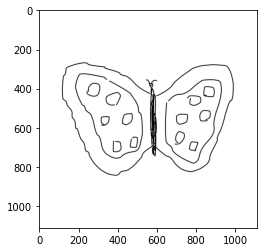

In [ ]:
img = image.load_img("./output/train/butterfly/2802.png")
plt.imshow(img)

In [ ]:
cv2.imread("./output/train/butterfly/2802.png").shape

(1111, 1111, 3)

In [ ]:
train = ImageDataGenerator(rescale=1/250)
validation = ImageDataGenerator(rescale=1/250)

In [ ]:
train_dataset = train.flow_from_directory('./output/train/',
                                         target_size=(250,250),
                                         batch_size=32,
                                         class_mode='categorical')

Found 3264 images belonging to 50 classes.


In [ ]:
validation_dataset = validation.flow_from_directory('./output/val/',
                                         target_size=(250,250),
                                         batch_size=32,
                                         class_mode='categorical')

Found 408 images belonging to 50 classes.


In [ ]:
# cnn = tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(filters=60, kernel_size=(5, 5), activation='relu', input_shape=(255, 255, 3)),
#     tf.keras.layers.MaxPooling2D((2, 2)),
    
#     tf.keras.layers.Conv2D(filters=30, kernel_size=(3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2)),

#     tf.keras.layers.Conv2D(filters=15, kernel_size=(3, 3), activation='relu'),
#     tf.keras.layers.MaxPooling2D((2, 2)),

#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Flatten(),

#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(50, activation='relu'),
#     tf.keras.layers.Dense(50, activation='softmax')
# ])

In [ ]:
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(250, 250, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(50, activation='softmax')
  ])


In [ ]:
# conv_base = tf.keras.applications.EfficientNetB3(include_top=False,
#                   input_shape=(224, 224, 3),
#                   pooling='max')

In [ ]:
cnn.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
cnn.fit(train_dataset,epochs=50,validation_data=validation_dataset)

Epoch 1/50
102/102 [==============================] - 30s 181ms/step - loss: 3.5051 - accuracy: 0.1235 - val_loss: 2.6507 - val_accuracy: 0.3015
Epoch 2/50
102/102 [==============================] - 18s 172ms/step - loss: 1.9512 - accuracy: 0.4923 - val_loss: 1.7965 - val_accuracy: 0.5294
Epoch 3/50
102/102 [==============================] - 21s 204ms/step - loss: 0.9515 - accuracy: 0.7255 - val_loss: 1.7329 - val_accuracy: 0.5662
Epoch 4/50
102/102 [==============================] - 18s 174ms/step - loss: 0.3743 - accuracy: 0.8817 - val_loss: 2.2620 - val_accuracy: 0.5368
Epoch 5/50
102/102 [==============================] - 18s 173ms/step - loss: 0.1950 - accuracy: 0.9357 - val_loss: 2.8732 - val_accuracy: 0.5539
Epoch 6/50
102/102 [==============================] - 18s 173ms/step - loss: 0.1643 - accuracy: 0.9467 - val_loss: 2.5897 - val_accuracy: 0.5466
Epoch 7/50
102/102 [==============================] - 18s 174ms/step - loss: 0.0998 - accuracy: 0.9694 - val_loss: 2.5967 - val_ac

In [ ]:
validation_dataset.class_indices

{'alarm clock': 0,
 'angel': 1,
 'apple': 2,
 'backpack': 3,
 'banana': 4,
 'basket': 5,
 'bed': 6,
 'bell': 7,
 'bicycle': 8,
 'binoculars': 9,
 'book': 10,
 'bus': 11,
 'butterfly': 12,
 'camera': 13,
 'car (sedan)': 14,
 'cat': 15,
 'chair': 16,
 'cloud': 17,
 'cow': 18,
 'cup': 19,
 'dog': 20,
 'door': 21,
 'duck': 22,
 'ear': 23,
 'eye': 24,
 'eyeglasses': 25,
 'fish': 26,
 'flying bird': 27,
 'guitar': 28,
 'hand': 29,
 'hat': 30,
 'helicopter': 31,
 'horse': 32,
 'house': 33,
 'key': 34,
 'knife': 35,
 'ladder': 36,
 'laptop': 37,
 'monkey': 38,
 'moon': 39,
 'pen': 40,
 'person': 41,
 'radio': 42,
 'scissors': 43,
 'screwdriver': 44,
 'shoe': 45,
 'socks': 46,
 'table': 47,
 'teacup': 48,
 'telephone': 49}

In [ ]:
train_acc = cnn.evaluate(train_dataset,verbose=0)
train_acc

[0.01903492398560047, 0.9963235259056091]

In [ ]:
test_acc = cnn.evaluate(validation_dataset,verbose=0)
test_acc

[4.082448959350586, 0.5465686321258545]

In [ ]:
classes = []
for root, dirs, files in os.walk('/content/output/test'):
  classes.append(dirs)
  break
classes = classes[0]
classes.sort()
print(classes)

['alarm clock', 'angel', 'apple', 'backpack', 'banana', 'basket', 'bed', 'bell', 'bicycle', 'binoculars', 'book', 'bus', 'butterfly', 'camera', 'car (sedan)', 'cat', 'chair', 'cloud', 'cow', 'cup', 'dog', 'door', 'duck', 'ear', 'eye', 'eyeglasses', 'fish', 'flying bird', 'guitar', 'hand', 'hat', 'helicopter', 'horse', 'house', 'key', 'knife', 'ladder', 'laptop', 'monkey', 'moon', 'pen', 'person', 'radio', 'scissors', 'screwdriver', 'shoe', 'socks', 'table', 'teacup', 'telephone']


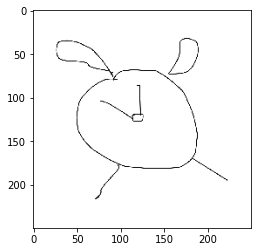

1/1 [==============================] - 0s 413ms/step
alarm clock


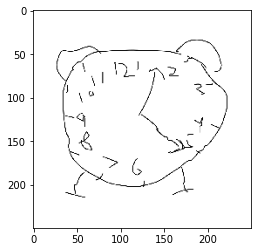

1/1 [==============================] - 0s 54ms/step
book


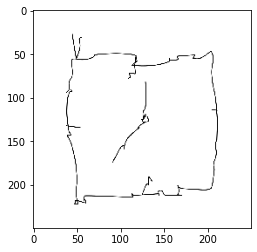

1/1 [==============================] - 0s 53ms/step
door


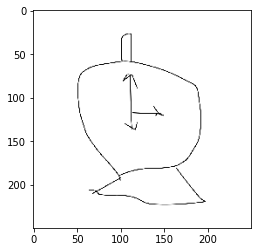

1/1 [==============================] - 0s 58ms/step
alarm clock


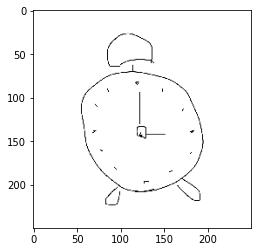

1/1 [==============================] - 0s 47ms/step
alarm clock


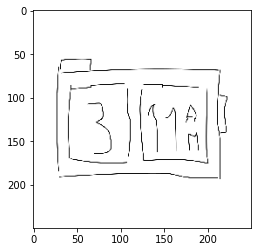

1/1 [==============================] - 0s 22ms/step
radio


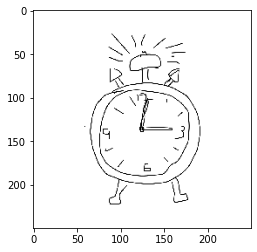

1/1 [==============================] - 0s 32ms/step
monkey


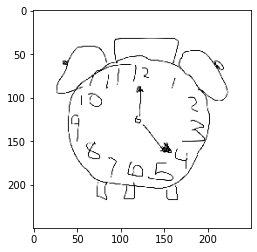

1/1 [==============================] - 0s 16ms/step
alarm clock


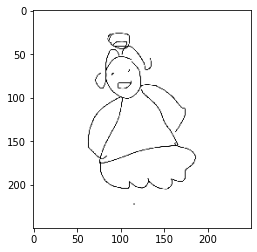

1/1 [==============================] - 0s 17ms/step
angel


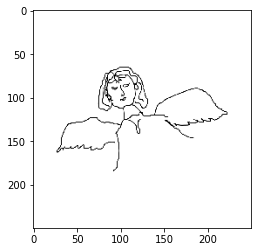

1/1 [==============================] - 0s 17ms/step
telephone


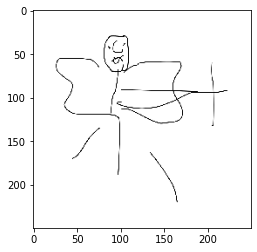

1/1 [==============================] - 0s 15ms/step
angel


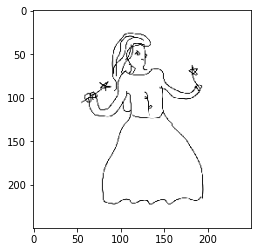

1/1 [==============================] - 0s 15ms/step
angel


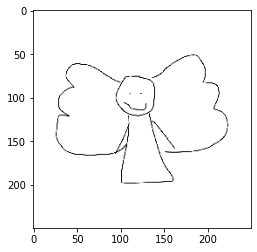

1/1 [==============================] - 0s 16ms/step
angel


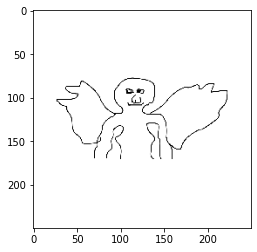

1/1 [==============================] - 0s 16ms/step
angel


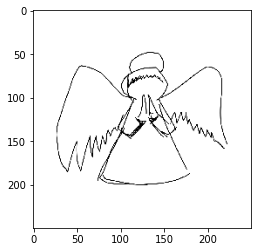

1/1 [==============================] - 0s 21ms/step
angel


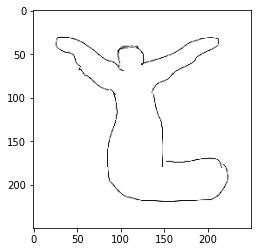

1/1 [==============================] - 0s 20ms/step
socks


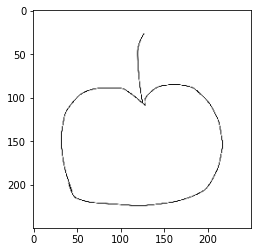

1/1 [==============================] - 0s 18ms/step
apple


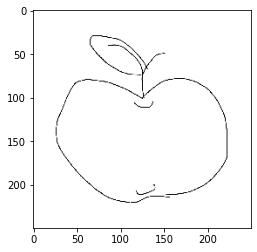

1/1 [==============================] - 0s 17ms/step
apple


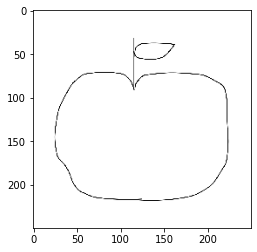

1/1 [==============================] - 0s 16ms/step
apple


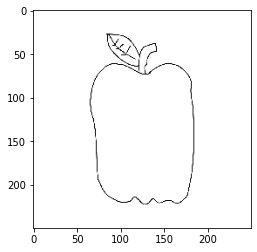

1/1 [==============================] - 0s 23ms/step
apple


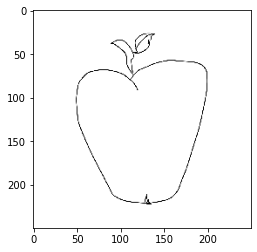

1/1 [==============================] - 0s 16ms/step
apple


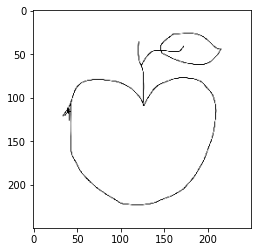

1/1 [==============================] - 0s 22ms/step
apple


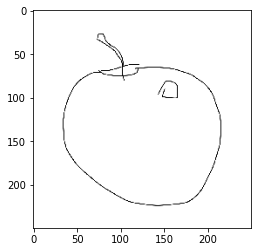

1/1 [==============================] - 0s 16ms/step
apple


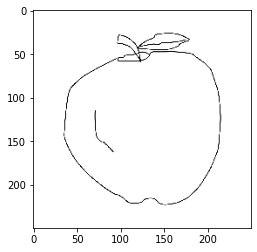

1/1 [==============================] - 0s 17ms/step
apple


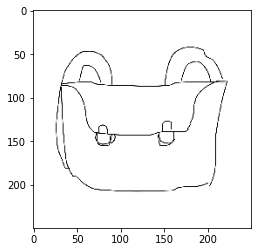

1/1 [==============================] - 0s 16ms/step
teacup


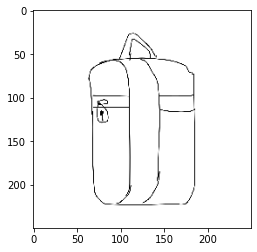

1/1 [==============================] - 0s 17ms/step
backpack


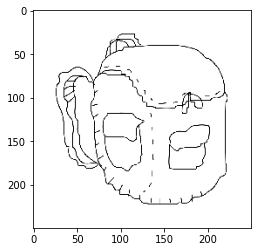

1/1 [==============================] - 0s 16ms/step
basket


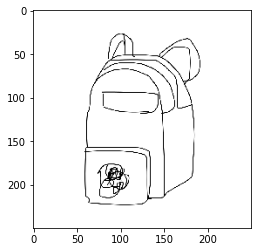

1/1 [==============================] - 0s 16ms/step
book


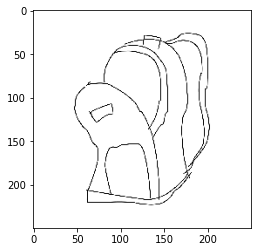

1/1 [==============================] - 0s 18ms/step
book


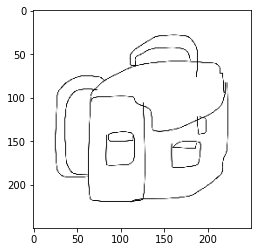

1/1 [==============================] - 0s 15ms/step
book


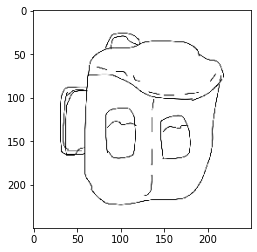

1/1 [==============================] - 0s 17ms/step
backpack


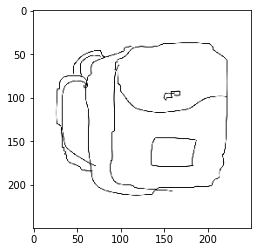

1/1 [==============================] - 0s 21ms/step
book


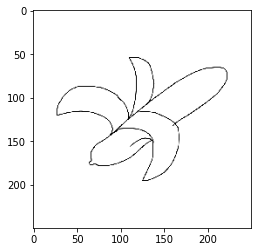

1/1 [==============================] - 0s 18ms/step
angel


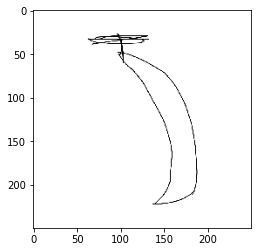

1/1 [==============================] - 0s 17ms/step
backpack


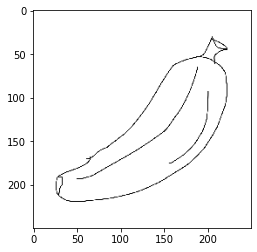

1/1 [==============================] - 0s 19ms/step
shoe


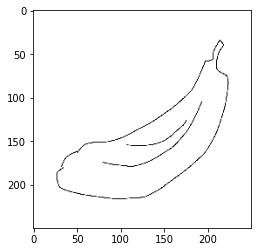

1/1 [==============================] - 0s 16ms/step
banana


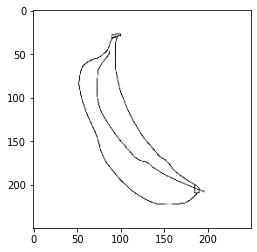

1/1 [==============================] - 0s 15ms/step
banana


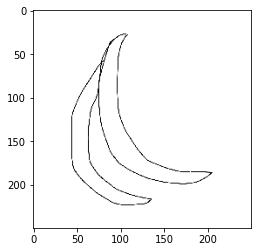

1/1 [==============================] - 0s 15ms/step
banana


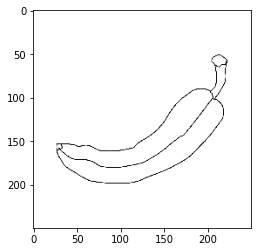

1/1 [==============================] - 0s 15ms/step
bed


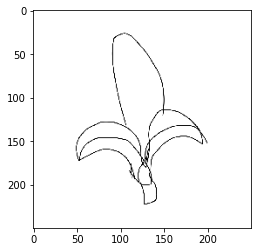

1/1 [==============================] - 0s 17ms/step
monkey


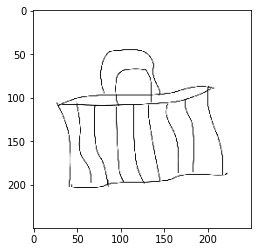

1/1 [==============================] - 0s 16ms/step
house


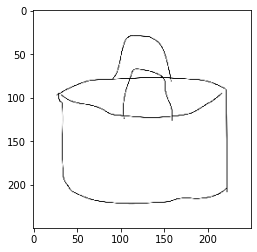

1/1 [==============================] - 0s 18ms/step
basket


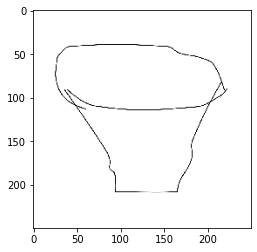

1/1 [==============================] - 0s 23ms/step
basket


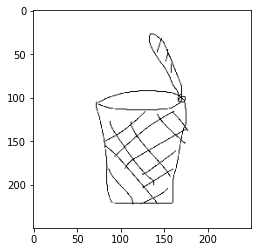

1/1 [==============================] - 0s 17ms/step
angel


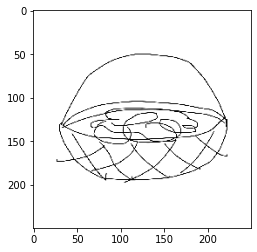

1/1 [==============================] - 0s 15ms/step
basket


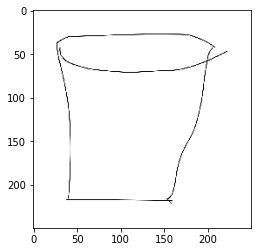

1/1 [==============================] - 0s 15ms/step
basket


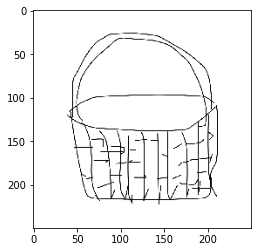

1/1 [==============================] - 0s 15ms/step
basket


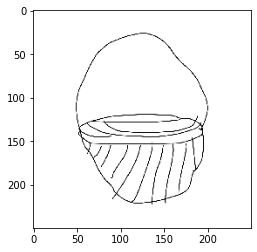

1/1 [==============================] - 0s 15ms/step
basket


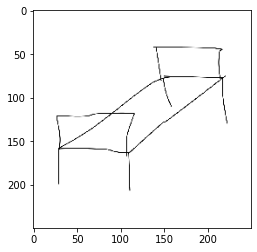

1/1 [==============================] - 0s 17ms/step
bed


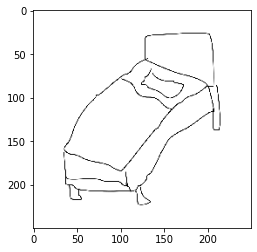

1/1 [==============================] - 0s 18ms/step
bed


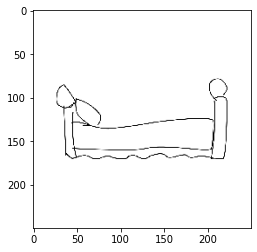

1/1 [==============================] - 0s 15ms/step
bed


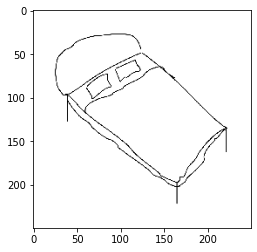

1/1 [==============================] - 0s 15ms/step
teacup


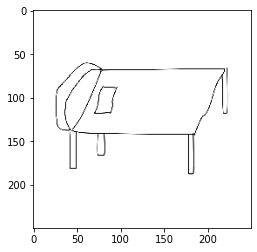

1/1 [==============================] - 0s 17ms/step
cow


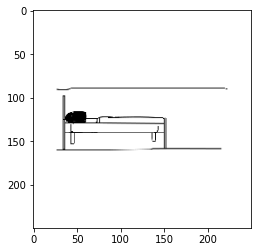

1/1 [==============================] - 0s 18ms/step
radio


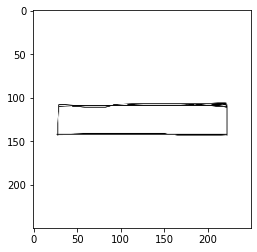

1/1 [==============================] - 0s 18ms/step
bed


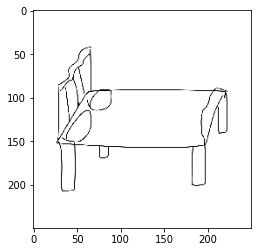

1/1 [==============================] - 0s 16ms/step
bus


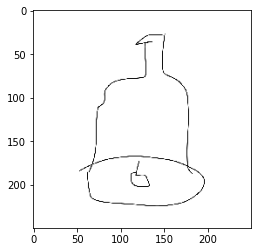

1/1 [==============================] - 0s 19ms/step
bell


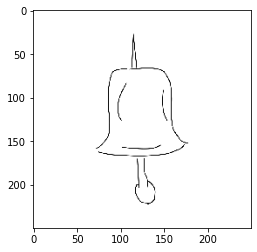

1/1 [==============================] - 0s 16ms/step
bell


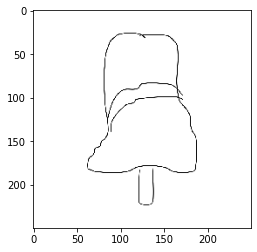

1/1 [==============================] - 0s 24ms/step
chair


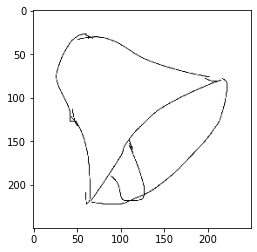

1/1 [==============================] - 0s 15ms/step
alarm clock


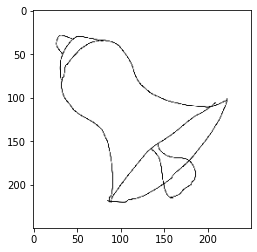

1/1 [==============================] - 0s 17ms/step
cup


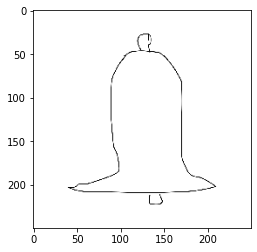

1/1 [==============================] - 0s 16ms/step
bell


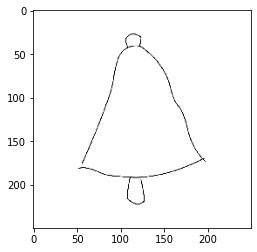

1/1 [==============================] - 0s 16ms/step
bell


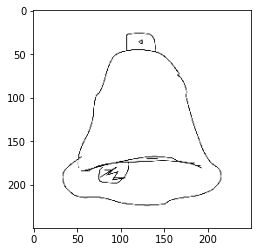

1/1 [==============================] - 0s 19ms/step
bell


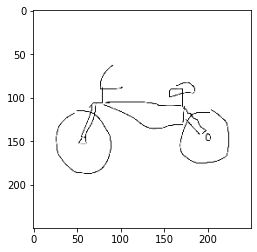

1/1 [==============================] - 0s 17ms/step
bicycle


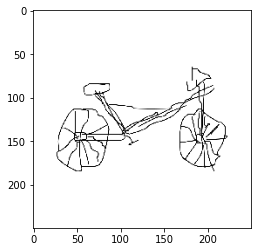

1/1 [==============================] - 0s 15ms/step
bicycle


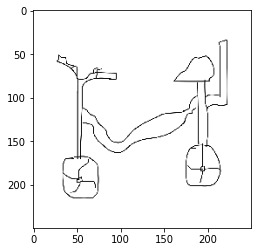

1/1 [==============================] - 0s 16ms/step
bicycle


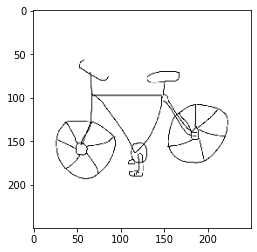

1/1 [==============================] - 0s 15ms/step
bicycle


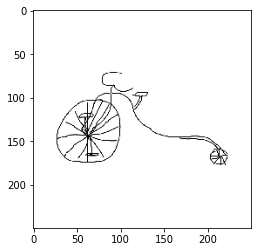

1/1 [==============================] - 0s 15ms/step
bicycle


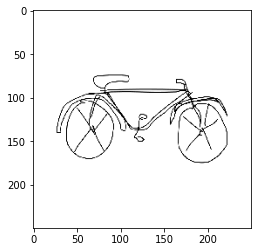

1/1 [==============================] - 0s 17ms/step
bicycle


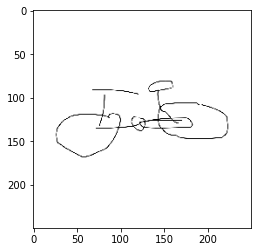

1/1 [==============================] - 0s 16ms/step
bicycle


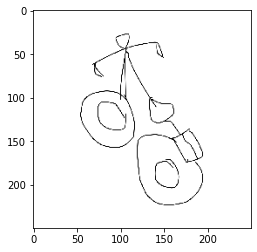

1/1 [==============================] - 0s 24ms/step
angel


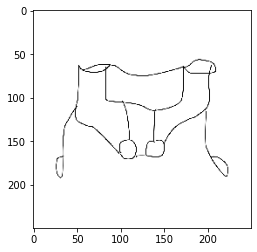

1/1 [==============================] - 0s 24ms/step
camera


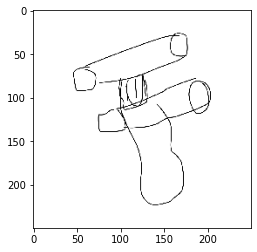

1/1 [==============================] - 0s 20ms/step
house


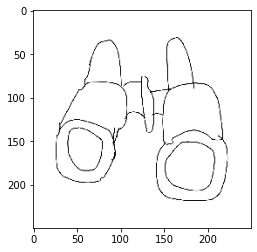

1/1 [==============================] - 0s 19ms/step
binoculars


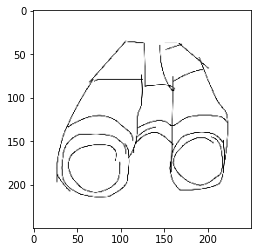

1/1 [==============================] - 0s 17ms/step
basket


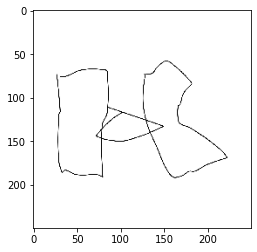

1/1 [==============================] - 0s 15ms/step
binoculars


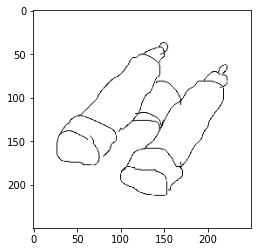

1/1 [==============================] - 0s 17ms/step
binoculars


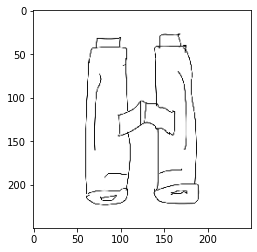

1/1 [==============================] - 0s 24ms/step
binoculars


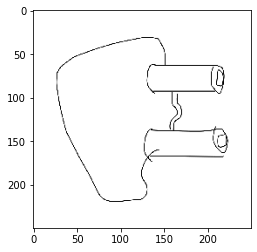

1/1 [==============================] - 0s 16ms/step
basket


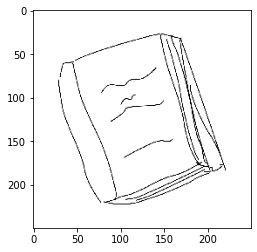

1/1 [==============================] - 0s 17ms/step
book


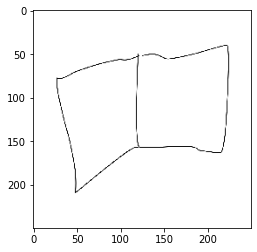

1/1 [==============================] - 0s 16ms/step
book


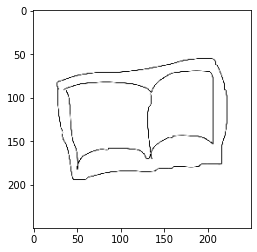

1/1 [==============================] - 0s 15ms/step
book


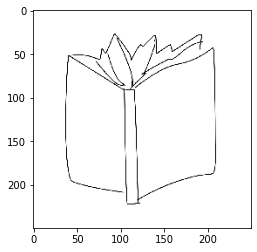

1/1 [==============================] - 0s 15ms/step
book


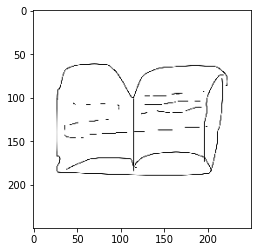

1/1 [==============================] - 0s 15ms/step
book


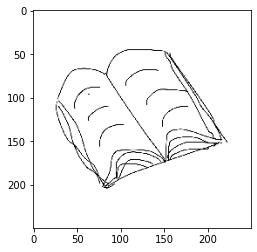

1/1 [==============================] - 0s 18ms/step
basket


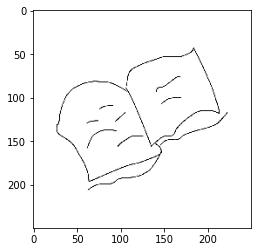

1/1 [==============================] - 0s 16ms/step
house


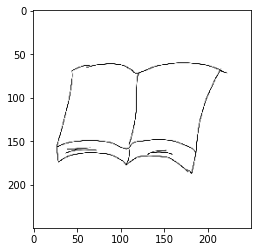

1/1 [==============================] - 0s 15ms/step
book


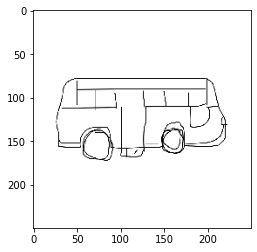

1/1 [==============================] - 0s 15ms/step
bus


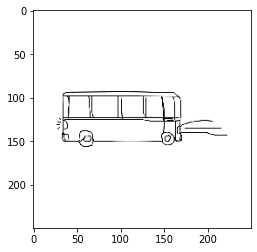

1/1 [==============================] - 0s 17ms/step
bus


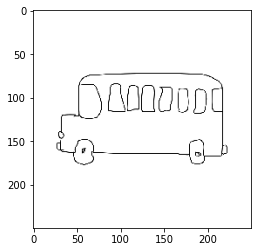

1/1 [==============================] - 0s 16ms/step
bus


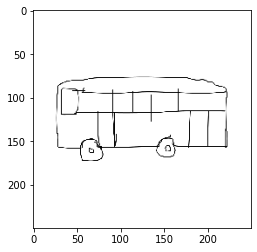

1/1 [==============================] - 0s 16ms/step
bus


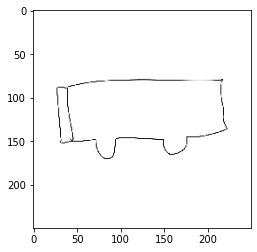

1/1 [==============================] - 0s 18ms/step
bus


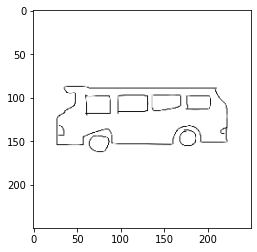

1/1 [==============================] - 0s 17ms/step
bus


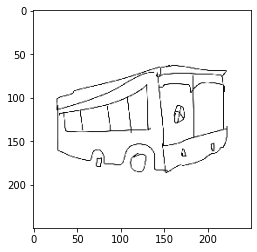

1/1 [==============================] - 0s 15ms/step
book


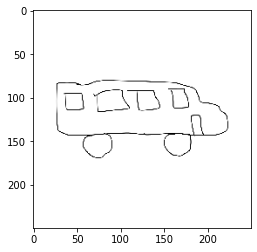

1/1 [==============================] - 0s 17ms/step
bus


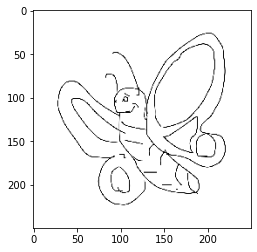

1/1 [==============================] - 0s 16ms/step
butterfly


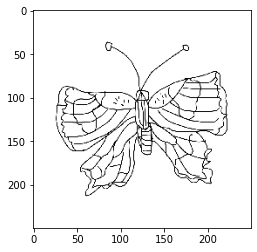

1/1 [==============================] - 0s 15ms/step
butterfly


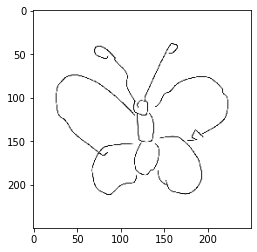

1/1 [==============================] - 0s 16ms/step
butterfly


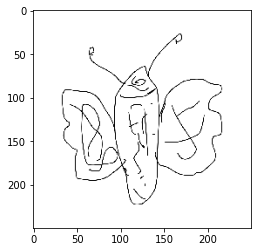

1/1 [==============================] - 0s 16ms/step
butterfly


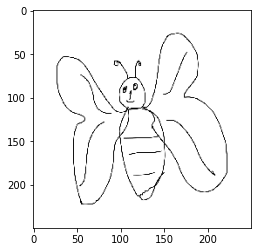

1/1 [==============================] - 0s 18ms/step
butterfly


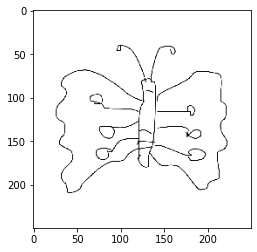

1/1 [==============================] - 0s 16ms/step
butterfly


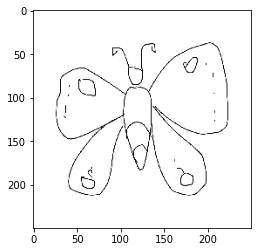

1/1 [==============================] - 0s 25ms/step
butterfly


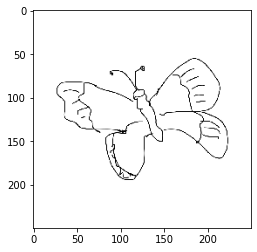

1/1 [==============================] - 0s 19ms/step
horse


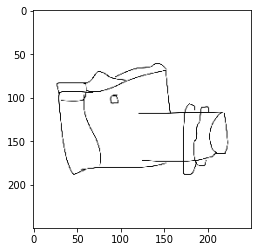

1/1 [==============================] - 0s 15ms/step
basket


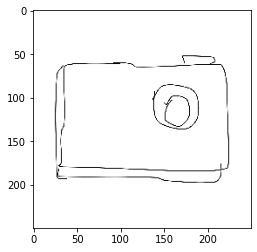

1/1 [==============================] - 0s 17ms/step
book


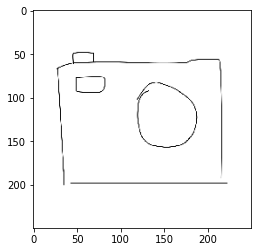

1/1 [==============================] - 0s 18ms/step
camera


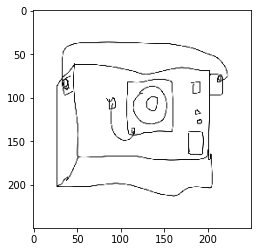

1/1 [==============================] - 0s 16ms/step
book


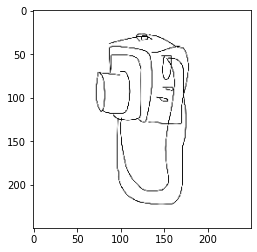

1/1 [==============================] - 0s 16ms/step
angel


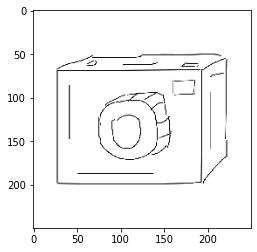

1/1 [==============================] - 0s 22ms/step
camera


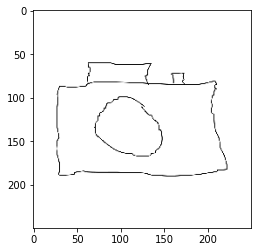

1/1 [==============================] - 0s 17ms/step
camera


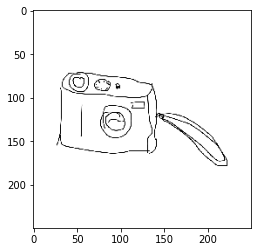

1/1 [==============================] - 0s 22ms/step
telephone


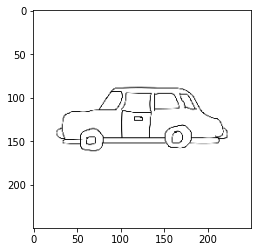

1/1 [==============================] - 0s 17ms/step
car (sedan)


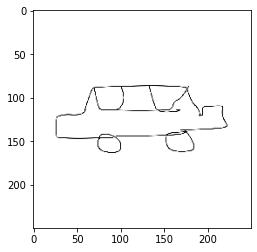

1/1 [==============================] - 0s 25ms/step
car (sedan)


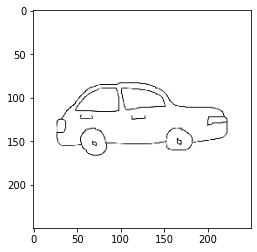

1/1 [==============================] - 0s 15ms/step
car (sedan)


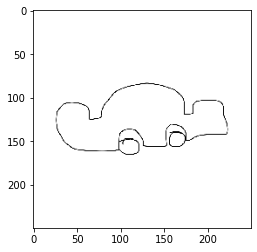

1/1 [==============================] - 0s 19ms/step
car (sedan)


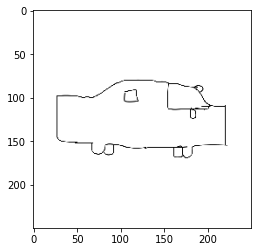

1/1 [==============================] - 0s 18ms/step
bus


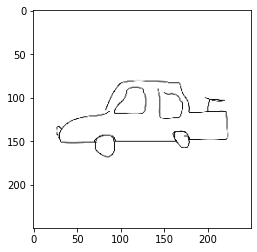

1/1 [==============================] - 0s 18ms/step
car (sedan)


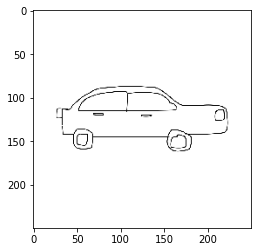

1/1 [==============================] - 0s 16ms/step
car (sedan)


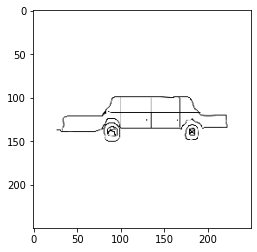

1/1 [==============================] - 0s 15ms/step
car (sedan)


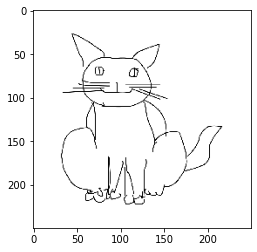

1/1 [==============================] - 0s 20ms/step
cat


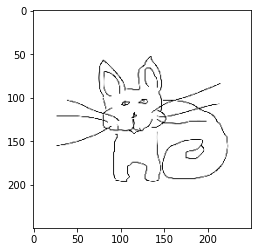

1/1 [==============================] - 0s 16ms/step
helicopter


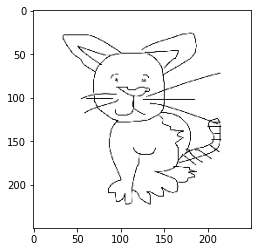

1/1 [==============================] - 0s 19ms/step
monkey


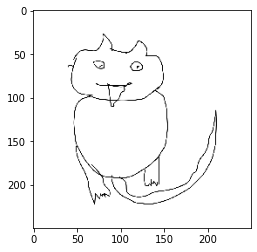

1/1 [==============================] - 0s 18ms/step
cat


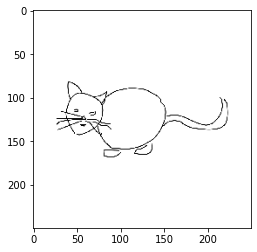

1/1 [==============================] - 0s 21ms/step
fish


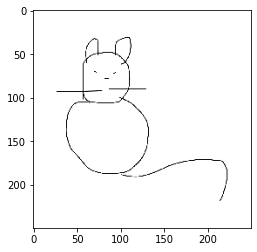

1/1 [==============================] - 0s 15ms/step
camera


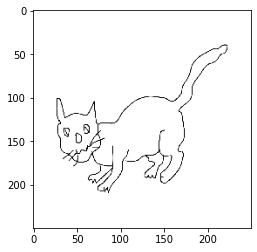

1/1 [==============================] - 0s 17ms/step
radio


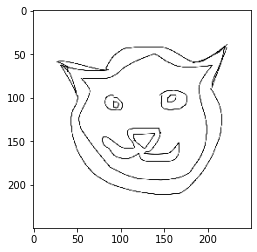

1/1 [==============================] - 0s 16ms/step
basket


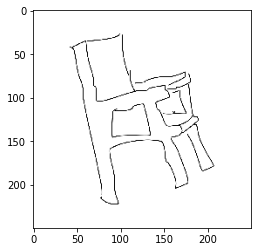

1/1 [==============================] - 0s 16ms/step
monkey


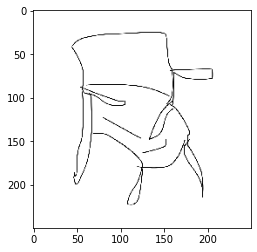

1/1 [==============================] - 0s 15ms/step
chair


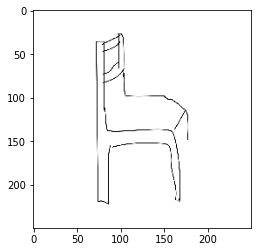

1/1 [==============================] - 0s 19ms/step
bed


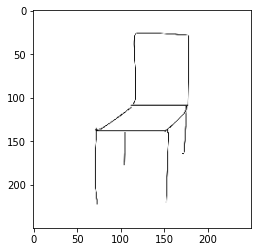

1/1 [==============================] - 0s 17ms/step
chair


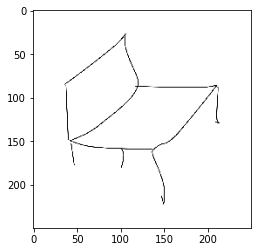

1/1 [==============================] - 0s 16ms/step
monkey


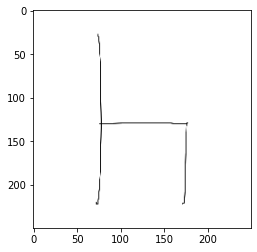

1/1 [==============================] - 0s 17ms/step
chair


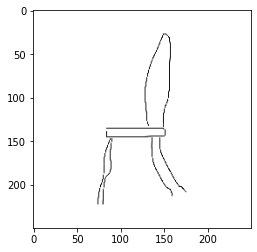

1/1 [==============================] - 0s 19ms/step
cow


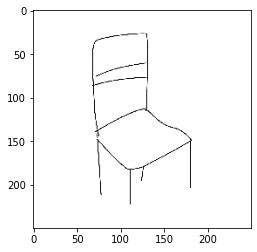

1/1 [==============================] - 0s 18ms/step
chair


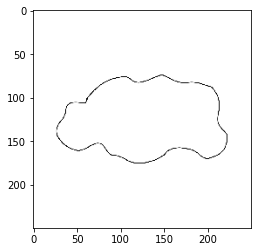

1/1 [==============================] - 0s 15ms/step
cloud


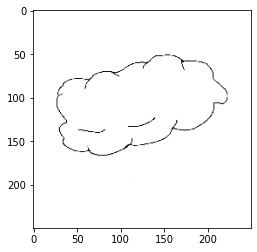

1/1 [==============================] - 0s 15ms/step
basket


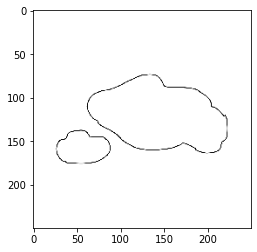

1/1 [==============================] - 0s 18ms/step
camera


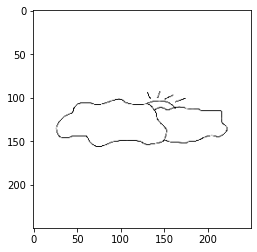

1/1 [==============================] - 0s 15ms/step
shoe


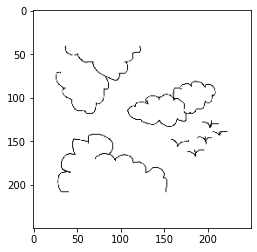

1/1 [==============================] - 0s 19ms/step
binoculars


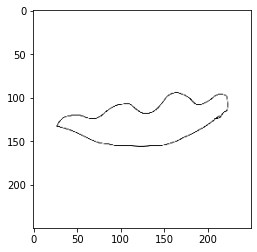

1/1 [==============================] - 0s 25ms/step
eye


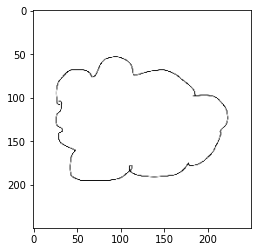

1/1 [==============================] - 0s 17ms/step
cloud


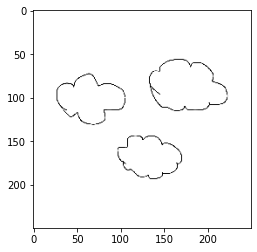

1/1 [==============================] - 0s 21ms/step
telephone


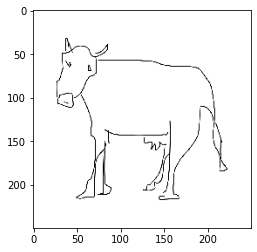

1/1 [==============================] - 0s 26ms/step
cow


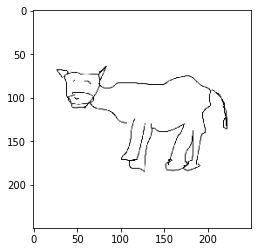

1/1 [==============================] - 0s 29ms/step
cow


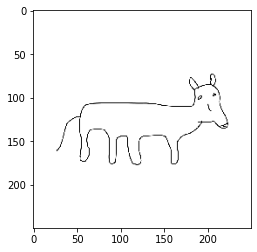

1/1 [==============================] - 0s 15ms/step
car (sedan)


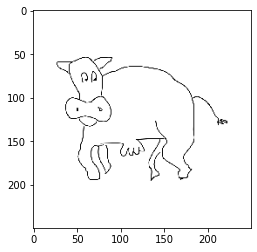

1/1 [==============================] - 0s 16ms/step
cow


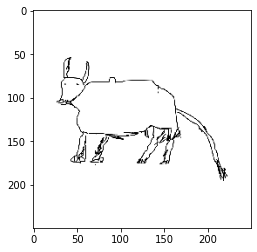

1/1 [==============================] - 0s 32ms/step
cow


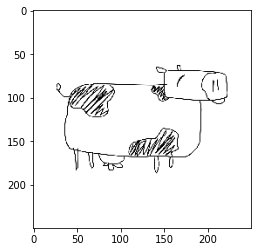

1/1 [==============================] - 0s 15ms/step
cat


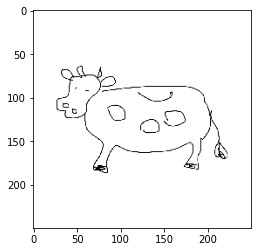

1/1 [==============================] - 0s 28ms/step
horse


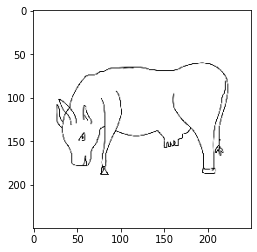

1/1 [==============================] - 0s 18ms/step
telephone


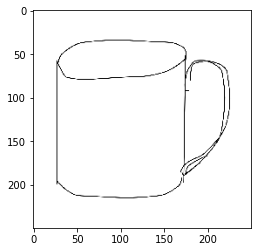

1/1 [==============================] - 0s 16ms/step
book


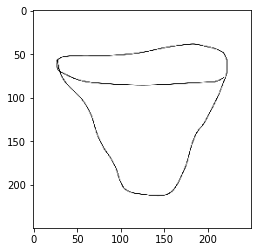

1/1 [==============================] - 0s 29ms/step
table


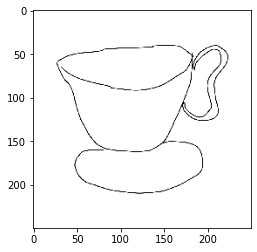

1/1 [==============================] - 0s 16ms/step
basket


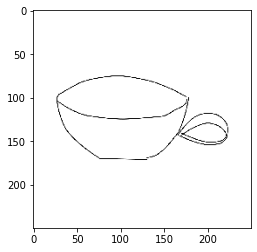

1/1 [==============================] - 0s 21ms/step
teacup


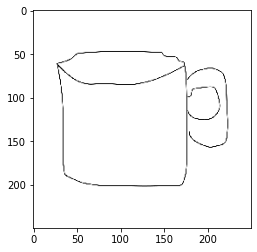

1/1 [==============================] - 0s 15ms/step
teacup


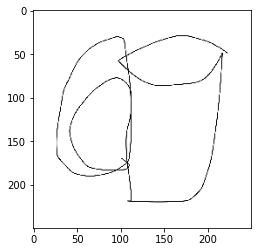

1/1 [==============================] - 0s 16ms/step
backpack


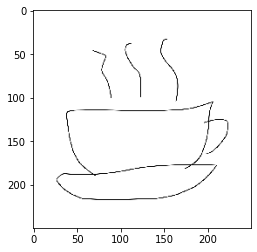

1/1 [==============================] - 0s 15ms/step
camera


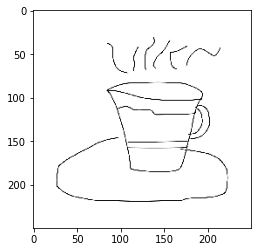

1/1 [==============================] - 0s 22ms/step
house


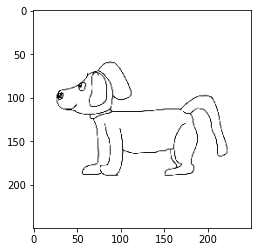

1/1 [==============================] - 0s 17ms/step
bus


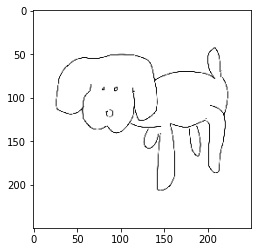

1/1 [==============================] - 0s 20ms/step
angel


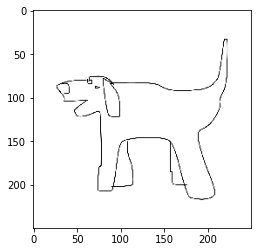

1/1 [==============================] - 0s 22ms/step
cow


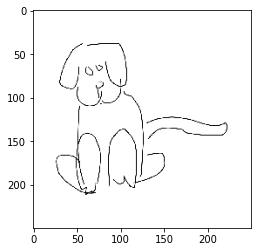

1/1 [==============================] - 0s 18ms/step
telephone


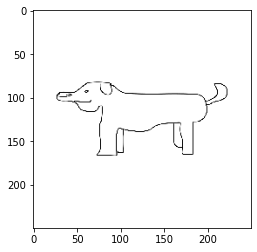

1/1 [==============================] - 0s 17ms/step
horse


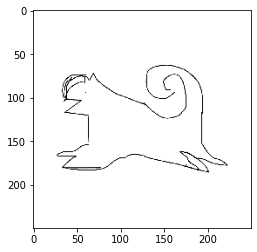

1/1 [==============================] - 0s 29ms/step
house


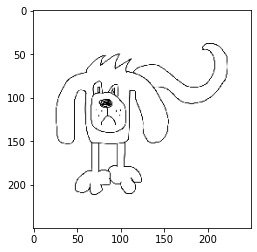

1/1 [==============================] - 0s 30ms/step
angel


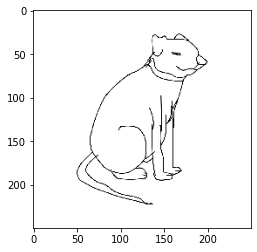

1/1 [==============================] - 0s 26ms/step
ladder


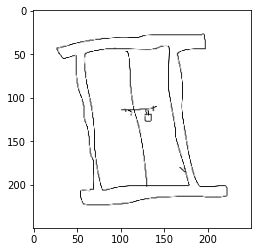

1/1 [==============================] - 0s 28ms/step
door


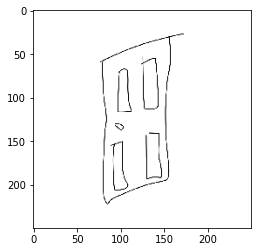

1/1 [==============================] - 0s 21ms/step
door


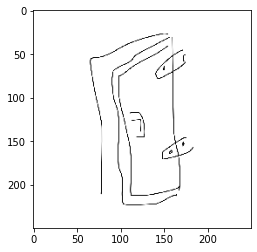

1/1 [==============================] - 0s 25ms/step
monkey


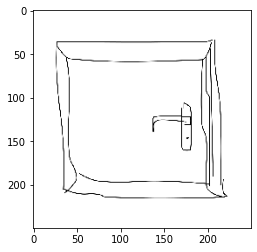

1/1 [==============================] - 0s 17ms/step
book


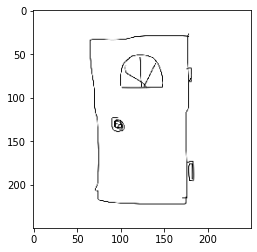

1/1 [==============================] - 0s 21ms/step
door


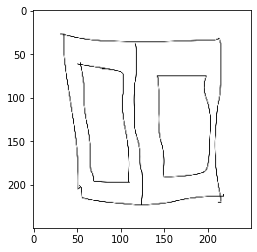

1/1 [==============================] - 0s 17ms/step
telephone


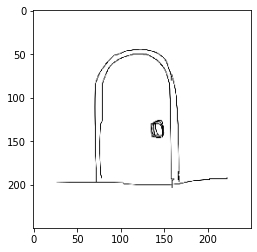

1/1 [==============================] - 0s 26ms/step
backpack


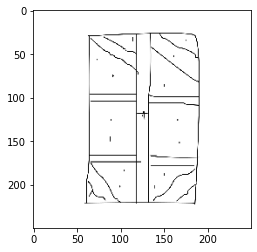

1/1 [==============================] - 0s 18ms/step
book


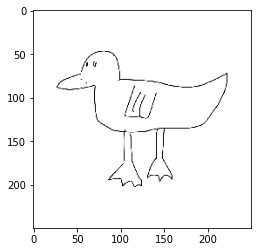

1/1 [==============================] - 0s 24ms/step
duck


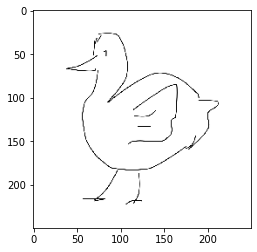

1/1 [==============================] - 0s 17ms/step
alarm clock


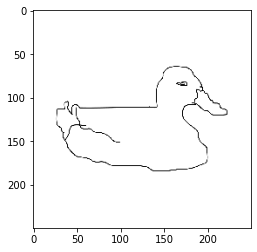

1/1 [==============================] - 0s 18ms/step
teacup


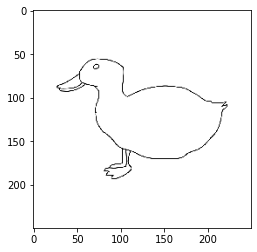

1/1 [==============================] - 0s 26ms/step
duck


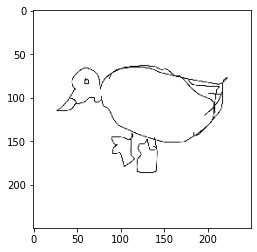

1/1 [==============================] - 0s 24ms/step
cow


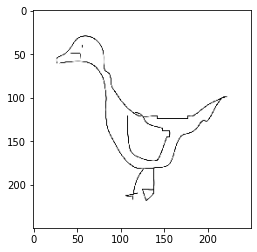

1/1 [==============================] - 0s 23ms/step
duck


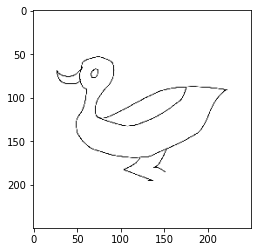

1/1 [==============================] - 0s 19ms/step
duck


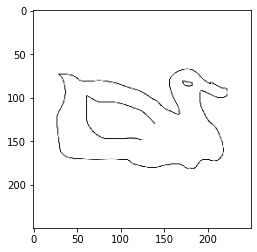

1/1 [==============================] - 0s 23ms/step
camera


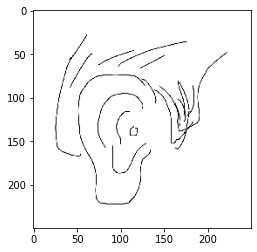

1/1 [==============================] - 0s 19ms/step
angel


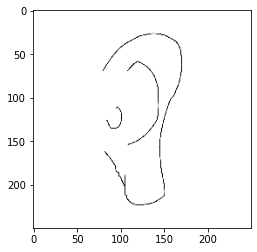

1/1 [==============================] - 0s 30ms/step
ear


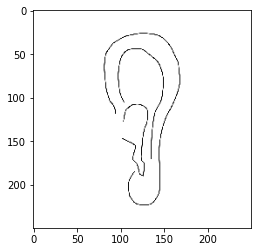

1/1 [==============================] - 0s 24ms/step
ear


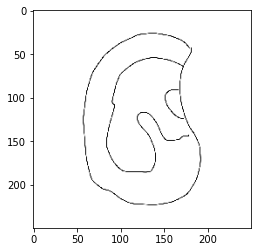

1/1 [==============================] - 0s 27ms/step
backpack


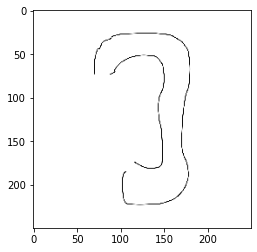

1/1 [==============================] - 0s 18ms/step
ear


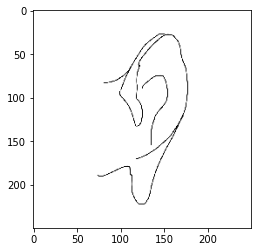

1/1 [==============================] - 0s 28ms/step
angel


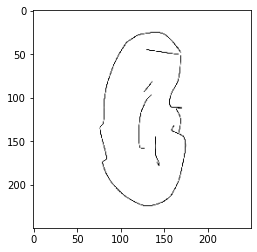

1/1 [==============================] - 0s 25ms/step
ear


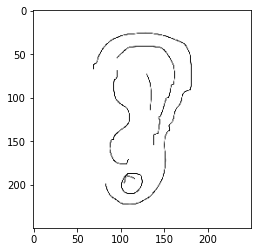

1/1 [==============================] - 0s 19ms/step
ear


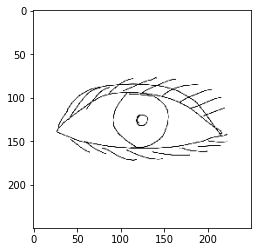

1/1 [==============================] - 0s 18ms/step
eye


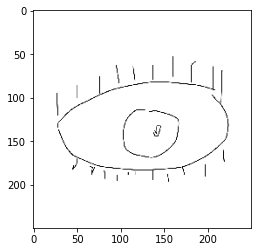

1/1 [==============================] - 0s 31ms/step
camera


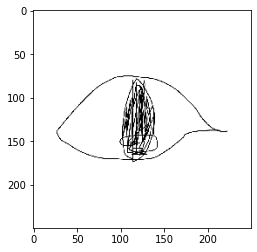

1/1 [==============================] - 0s 18ms/step
eye


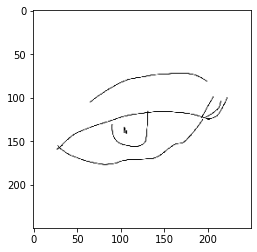

1/1 [==============================] - 0s 22ms/step
socks


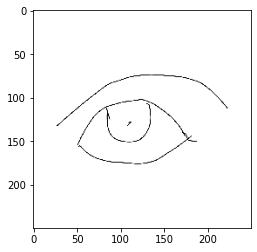

1/1 [==============================] - 0s 21ms/step
eye


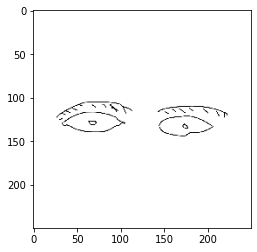

1/1 [==============================] - 0s 18ms/step
eye


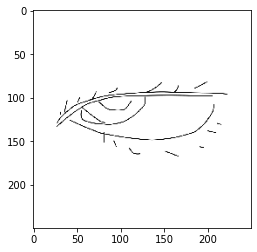

1/1 [==============================] - 0s 21ms/step
table


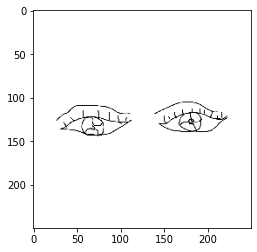

1/1 [==============================] - 0s 18ms/step
eye


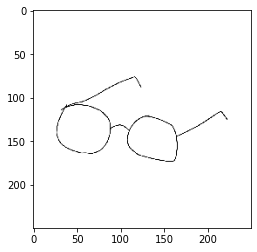

1/1 [==============================] - 0s 22ms/step
eyeglasses


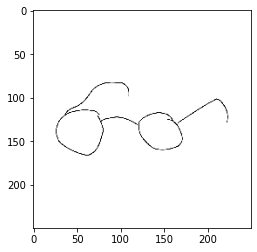

1/1 [==============================] - 0s 25ms/step
eyeglasses


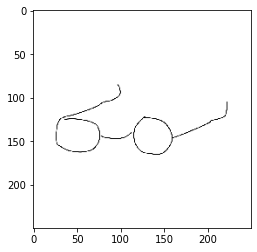

1/1 [==============================] - 0s 25ms/step
eyeglasses


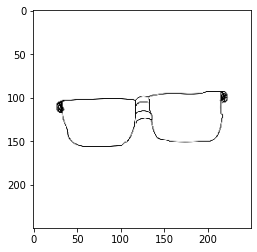

1/1 [==============================] - 0s 23ms/step
book


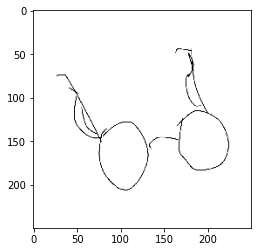

1/1 [==============================] - 0s 27ms/step
horse


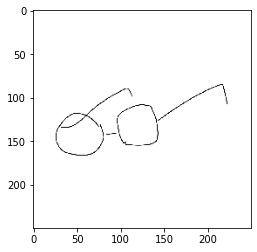

1/1 [==============================] - 0s 37ms/step
fish


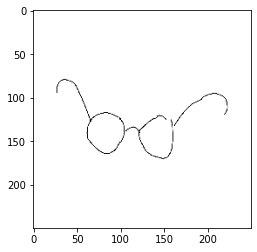

1/1 [==============================] - 0s 31ms/step
banana


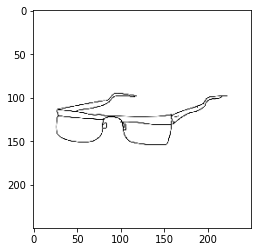

1/1 [==============================] - 0s 25ms/step
helicopter


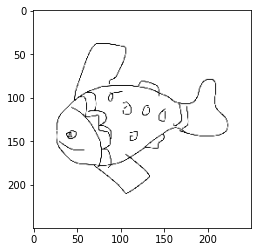

1/1 [==============================] - 0s 23ms/step
telephone


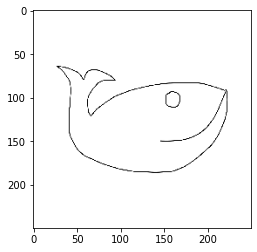

1/1 [==============================] - 0s 20ms/step
duck


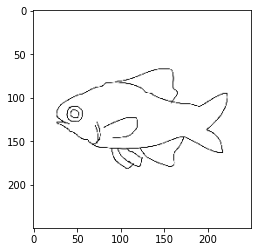

1/1 [==============================] - 0s 22ms/step
fish


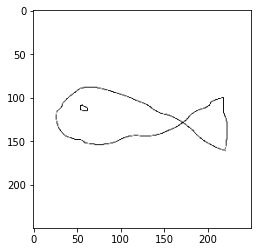

1/1 [==============================] - 0s 37ms/step
fish


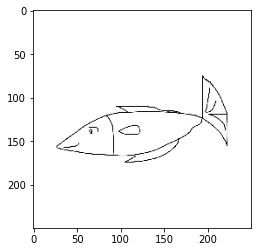

1/1 [==============================] - 0s 23ms/step
fish


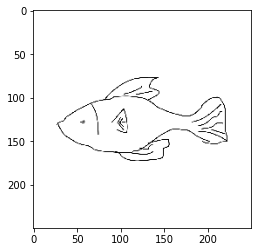

1/1 [==============================] - 0s 18ms/step
fish


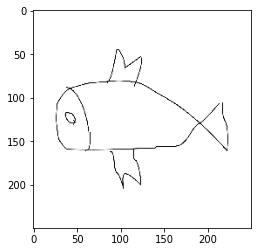

1/1 [==============================] - 0s 36ms/step
fish


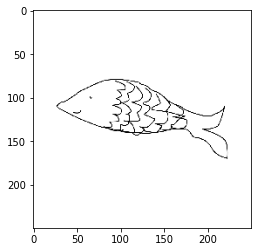

1/1 [==============================] - 0s 22ms/step
fish


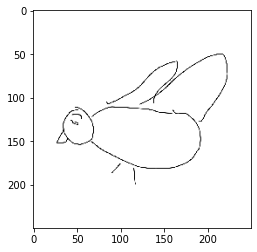

1/1 [==============================] - 0s 29ms/step
monkey


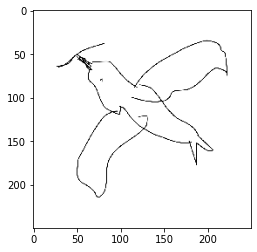

1/1 [==============================] - 0s 24ms/step
monkey


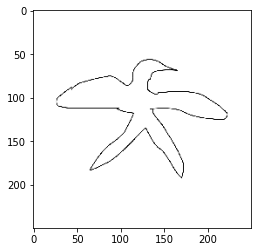

1/1 [==============================] - 0s 25ms/step
butterfly


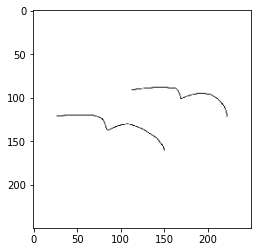

1/1 [==============================] - 0s 29ms/step
dog


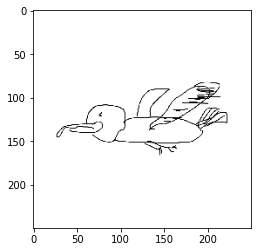

1/1 [==============================] - 0s 23ms/step
car (sedan)


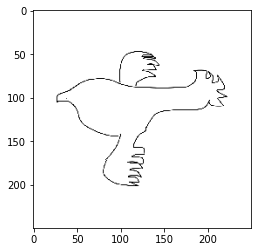

1/1 [==============================] - 0s 19ms/step
angel


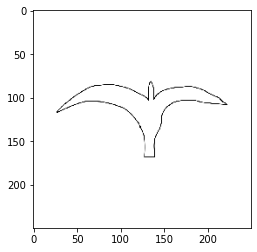

1/1 [==============================] - 0s 25ms/step
flying bird


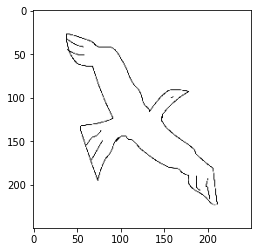

1/1 [==============================] - 0s 21ms/step
flying bird


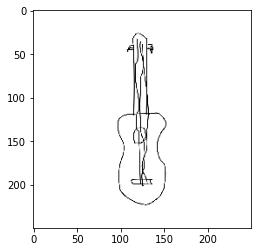

1/1 [==============================] - 0s 37ms/step
angel


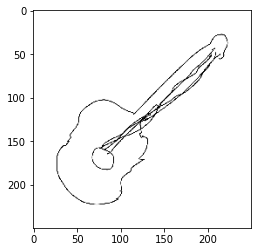

1/1 [==============================] - 0s 23ms/step
guitar


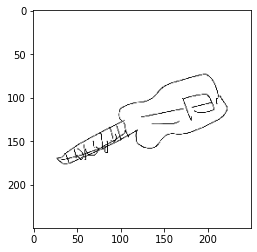

1/1 [==============================] - 0s 22ms/step
bus


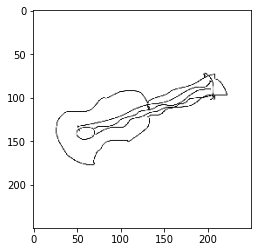

1/1 [==============================] - 0s 27ms/step
guitar


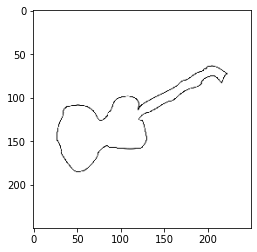

1/1 [==============================] - 0s 23ms/step
guitar


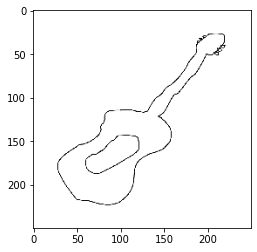

1/1 [==============================] - 0s 29ms/step
guitar


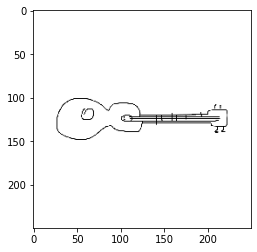

1/1 [==============================] - 0s 24ms/step
helicopter


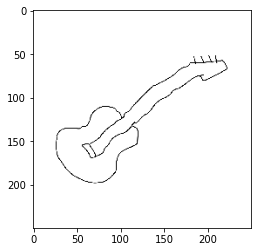

1/1 [==============================] - 0s 32ms/step
guitar


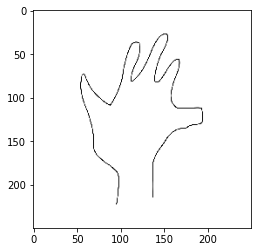

1/1 [==============================] - 0s 15ms/step
monkey


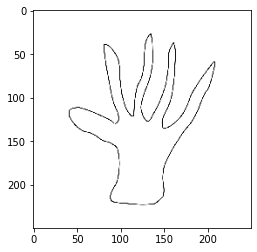

1/1 [==============================] - 0s 26ms/step
angel


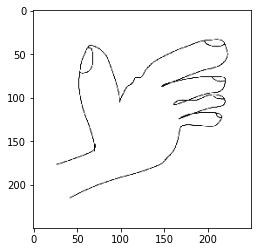

1/1 [==============================] - 0s 31ms/step
horse


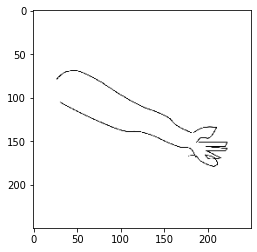

1/1 [==============================] - 0s 30ms/step
knife


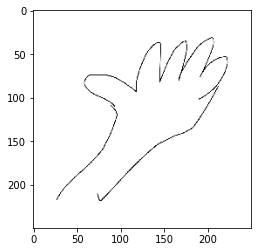

1/1 [==============================] - 0s 23ms/step
knife


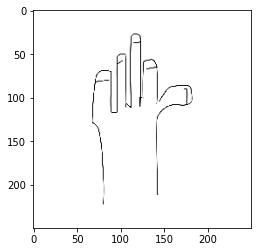

1/1 [==============================] - 0s 22ms/step
angel


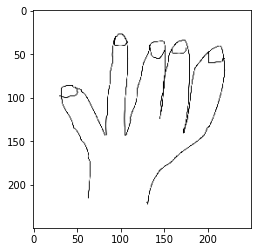

1/1 [==============================] - 0s 28ms/step
hand


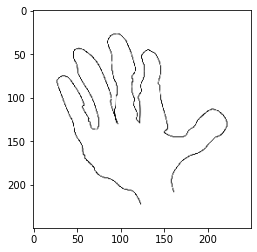

1/1 [==============================] - 0s 23ms/step
hand


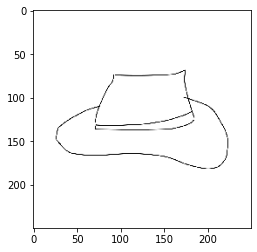

1/1 [==============================] - 0s 24ms/step
hat


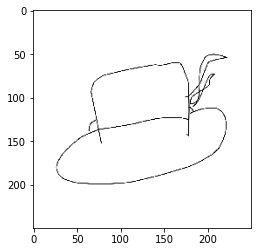

1/1 [==============================] - 0s 23ms/step
radio


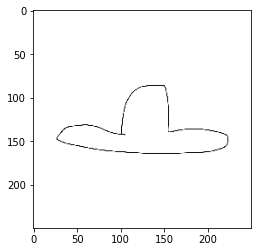

1/1 [==============================] - 0s 22ms/step
hat


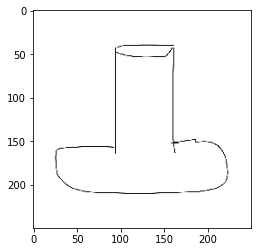

1/1 [==============================] - 0s 28ms/step
hat


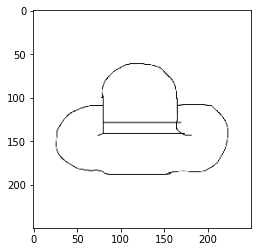

1/1 [==============================] - 0s 26ms/step
hat


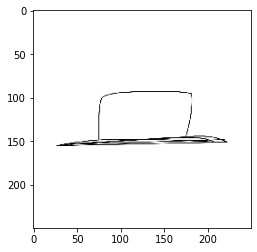

1/1 [==============================] - 0s 25ms/step
hat


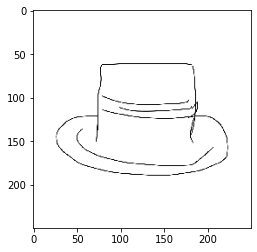

1/1 [==============================] - 0s 25ms/step
hat


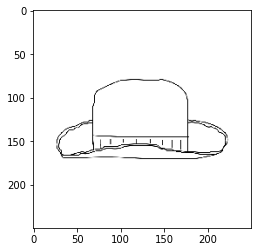

1/1 [==============================] - 0s 24ms/step
hat


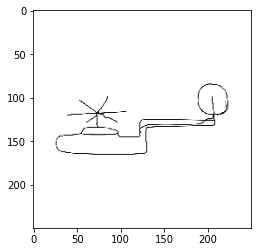

1/1 [==============================] - 0s 23ms/step
cat


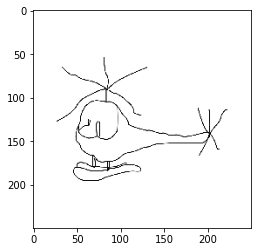

1/1 [==============================] - 0s 26ms/step
helicopter


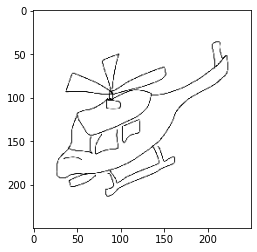

1/1 [==============================] - 0s 25ms/step
helicopter


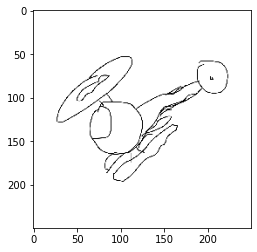

1/1 [==============================] - 0s 25ms/step
telephone


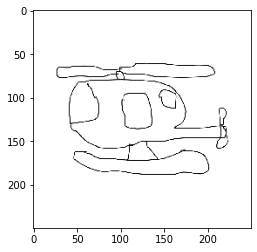

1/1 [==============================] - 0s 27ms/step
book


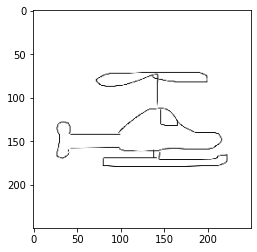

1/1 [==============================] - 0s 24ms/step
helicopter


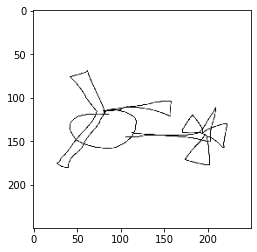

1/1 [==============================] - 0s 23ms/step
bicycle


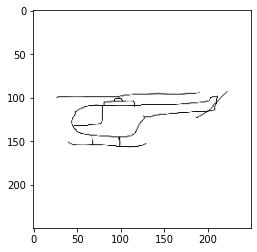

1/1 [==============================] - 0s 28ms/step
helicopter


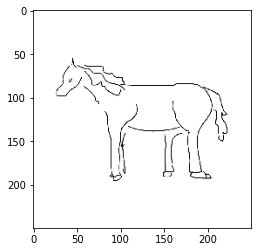

1/1 [==============================] - 0s 30ms/step
horse


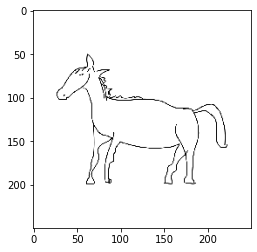

1/1 [==============================] - 0s 27ms/step
horse


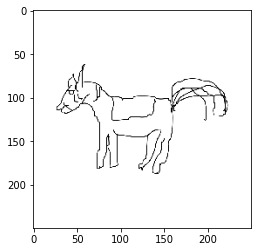

1/1 [==============================] - 0s 33ms/step
horse


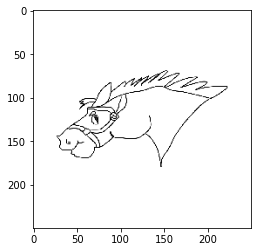

1/1 [==============================] - 0s 24ms/step
car (sedan)


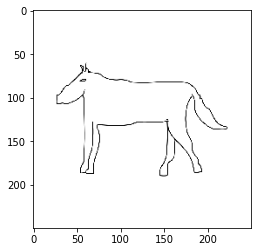

1/1 [==============================] - 0s 23ms/step
horse


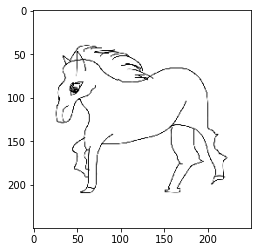

1/1 [==============================] - 0s 25ms/step
monkey


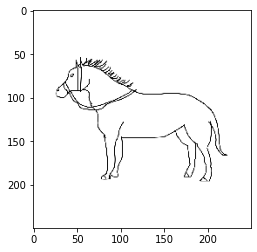

1/1 [==============================] - 0s 35ms/step
horse


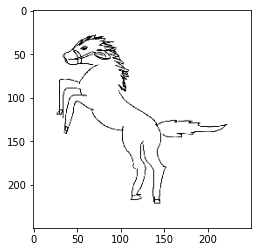

1/1 [==============================] - 0s 33ms/step
socks


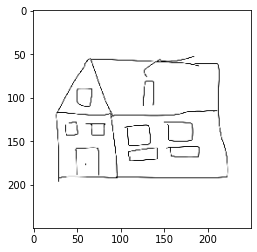

1/1 [==============================] - 0s 25ms/step
house


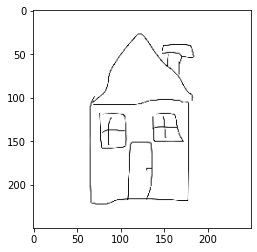

1/1 [==============================] - 0s 24ms/step
house


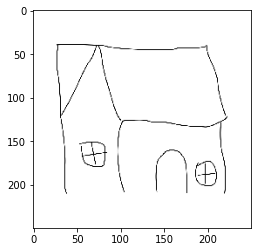

1/1 [==============================] - 0s 25ms/step
binoculars


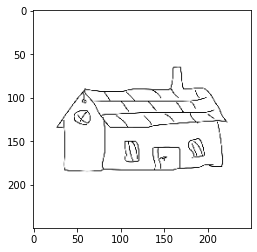

1/1 [==============================] - 0s 22ms/step
house


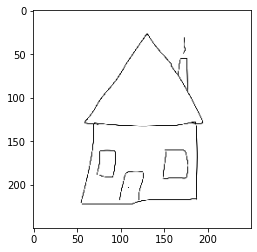

1/1 [==============================] - 0s 26ms/step
house


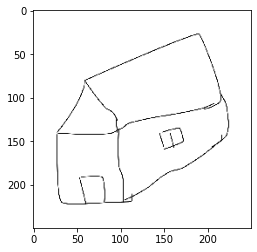

1/1 [==============================] - 0s 26ms/step
house


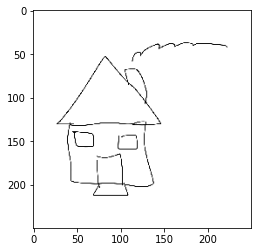

1/1 [==============================] - 0s 29ms/step
house


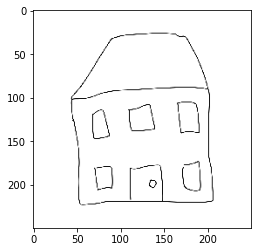

1/1 [==============================] - 0s 26ms/step
basket


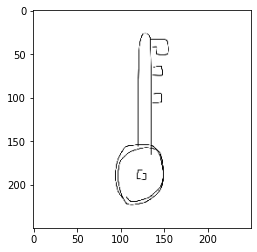

1/1 [==============================] - 0s 18ms/step
angel


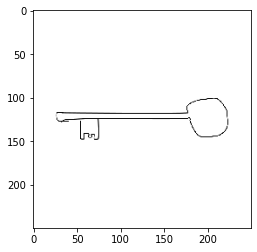

1/1 [==============================] - 0s 25ms/step
key


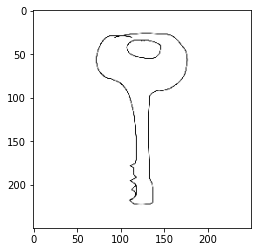

1/1 [==============================] - 0s 24ms/step
key


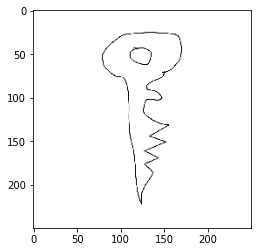

1/1 [==============================] - 0s 24ms/step
key


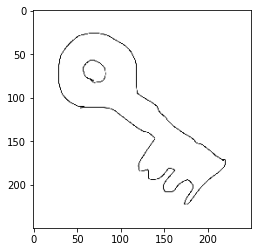

1/1 [==============================] - 0s 23ms/step
banana


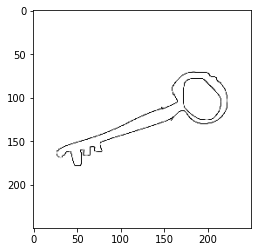

1/1 [==============================] - 0s 25ms/step
bus


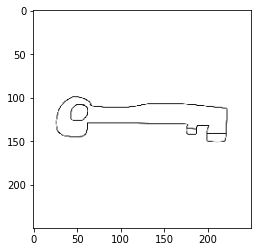

1/1 [==============================] - 0s 23ms/step
key


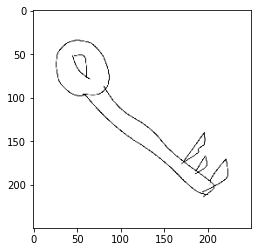

1/1 [==============================] - 0s 25ms/step
knife


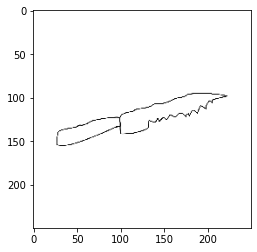

1/1 [==============================] - 0s 23ms/step
knife


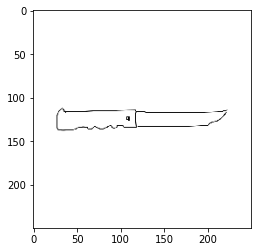

1/1 [==============================] - 0s 24ms/step
knife


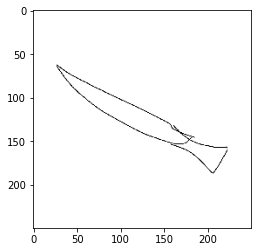

1/1 [==============================] - 0s 25ms/step
knife


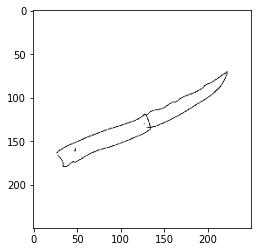

1/1 [==============================] - 0s 28ms/step
screwdriver


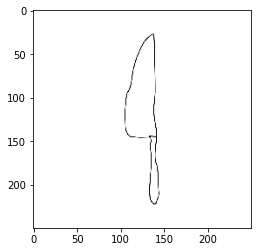

1/1 [==============================] - 0s 22ms/step
knife


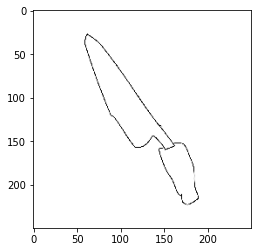

1/1 [==============================] - 0s 27ms/step
knife


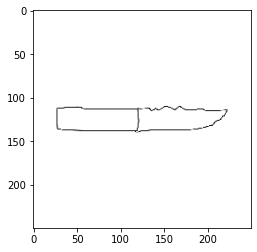

1/1 [==============================] - 0s 23ms/step
knife


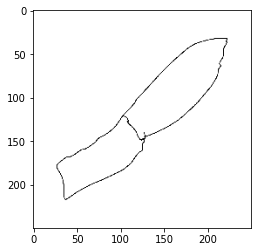

1/1 [==============================] - 0s 28ms/step
scissors


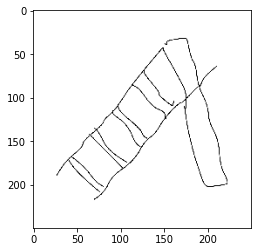

1/1 [==============================] - 0s 31ms/step
car (sedan)


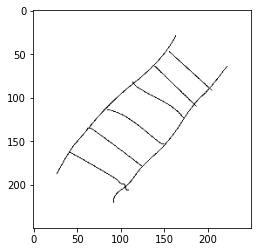

1/1 [==============================] - 0s 23ms/step
bed


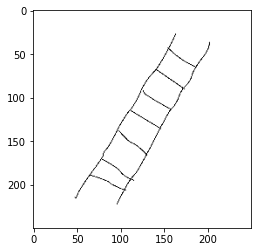

1/1 [==============================] - 0s 29ms/step
ladder


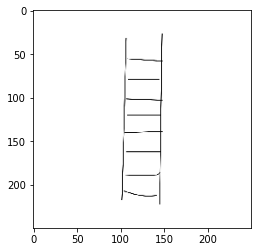

1/1 [==============================] - 0s 22ms/step
ladder


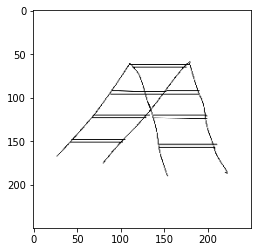

1/1 [==============================] - 0s 30ms/step
car (sedan)


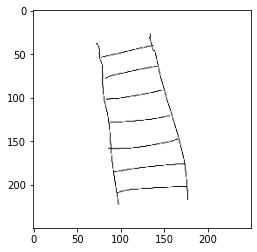

1/1 [==============================] - 0s 23ms/step
ladder


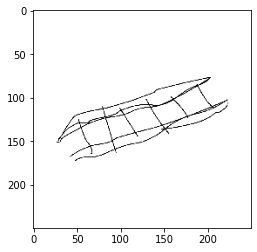

1/1 [==============================] - 0s 24ms/step
helicopter


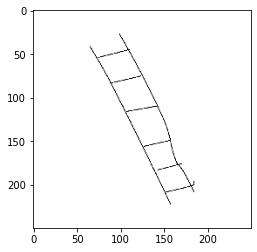

1/1 [==============================] - 0s 24ms/step
butterfly


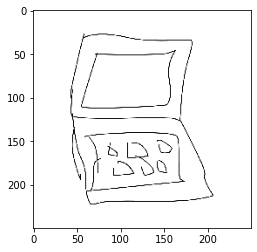

1/1 [==============================] - 0s 23ms/step
door


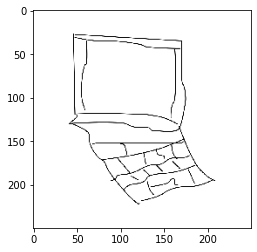

1/1 [==============================] - 0s 33ms/step
laptop


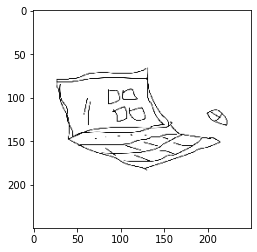

1/1 [==============================] - 0s 22ms/step
laptop


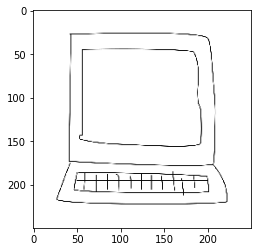

1/1 [==============================] - 0s 21ms/step
book


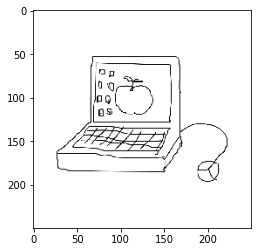

1/1 [==============================] - 0s 25ms/step
bicycle


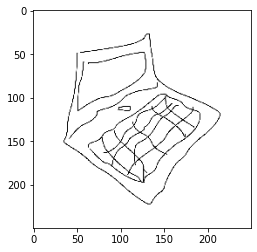

1/1 [==============================] - 0s 24ms/step
angel


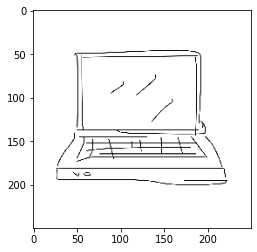

1/1 [==============================] - 0s 33ms/step
laptop


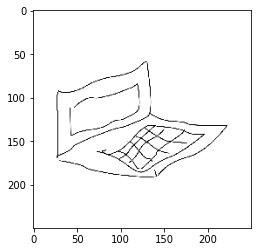

1/1 [==============================] - 0s 25ms/step
laptop


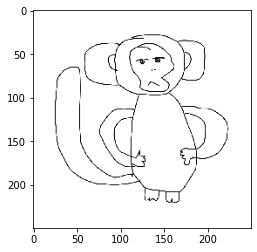

1/1 [==============================] - 0s 22ms/step
book


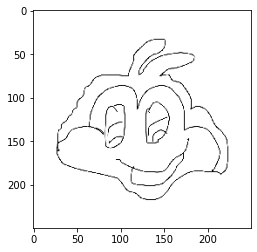

1/1 [==============================] - 0s 26ms/step
house


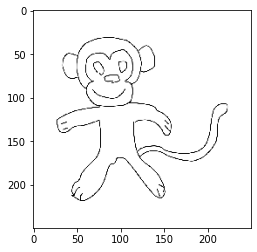

1/1 [==============================] - 0s 22ms/step
monkey


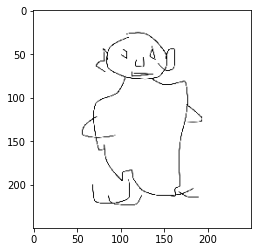

1/1 [==============================] - 0s 24ms/step
monkey


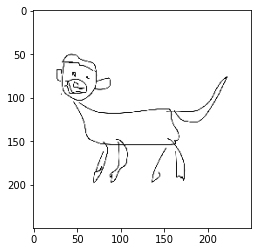

1/1 [==============================] - 0s 22ms/step
dog


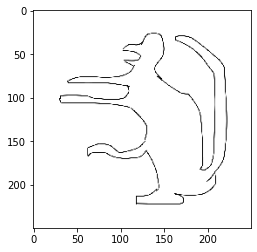

1/1 [==============================] - 0s 23ms/step
alarm clock


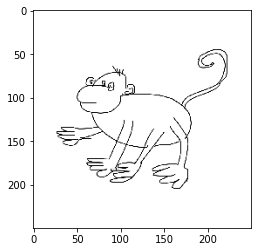

1/1 [==============================] - 0s 24ms/step
telephone


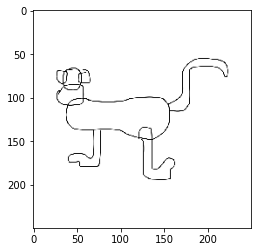

1/1 [==============================] - 0s 24ms/step
cow


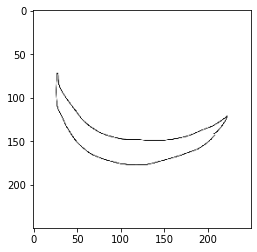

1/1 [==============================] - 0s 18ms/step
bed


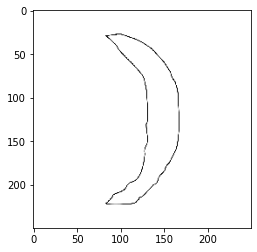

1/1 [==============================] - 0s 22ms/step
moon


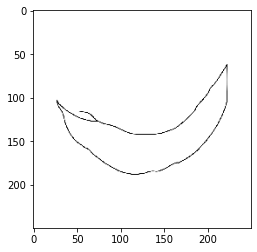

1/1 [==============================] - 0s 32ms/step
banana


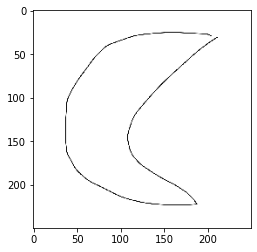

1/1 [==============================] - 0s 21ms/step
moon


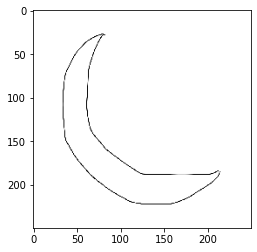

1/1 [==============================] - 0s 26ms/step
moon


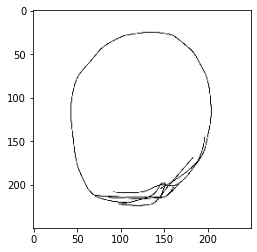

1/1 [==============================] - 0s 23ms/step
basket


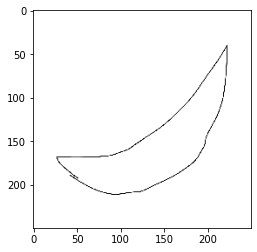

1/1 [==============================] - 0s 22ms/step
moon


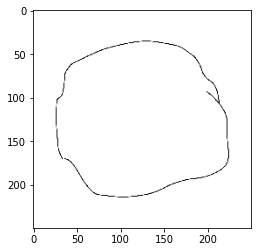

1/1 [==============================] - 0s 22ms/step
basket


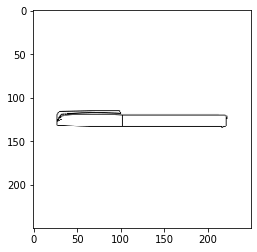

1/1 [==============================] - 0s 26ms/step
bed


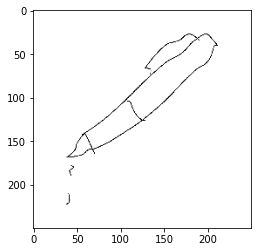

1/1 [==============================] - 0s 24ms/step
screwdriver


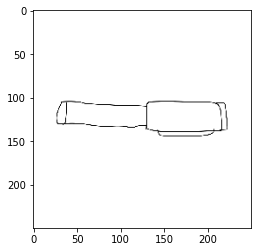

1/1 [==============================] - 0s 24ms/step
bed


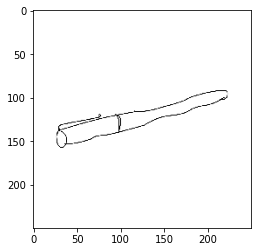

1/1 [==============================] - 0s 26ms/step
pen


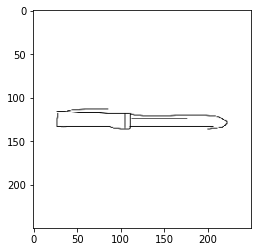

1/1 [==============================] - 0s 25ms/step
screwdriver


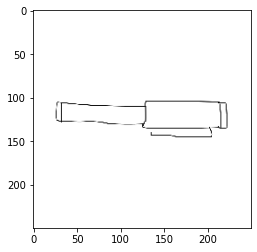

1/1 [==============================] - 0s 24ms/step
scissors


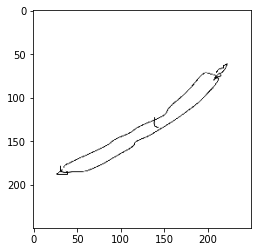

1/1 [==============================] - 0s 22ms/step
screwdriver


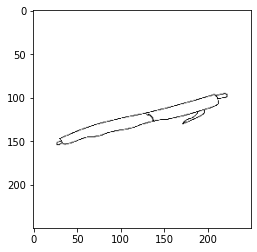

1/1 [==============================] - 0s 25ms/step
screwdriver


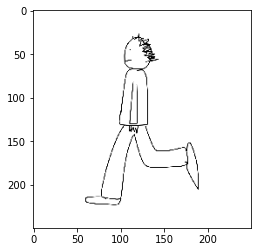

1/1 [==============================] - 0s 21ms/step
monkey


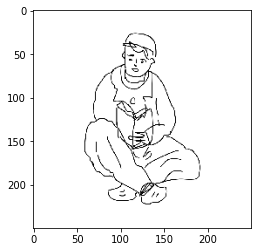

1/1 [==============================] - 0s 23ms/step
angel


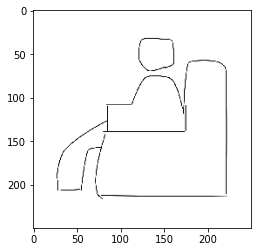

1/1 [==============================] - 0s 23ms/step
camera


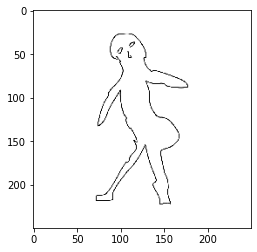

1/1 [==============================] - 0s 24ms/step
person


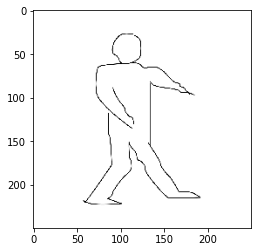

1/1 [==============================] - 0s 23ms/step
person


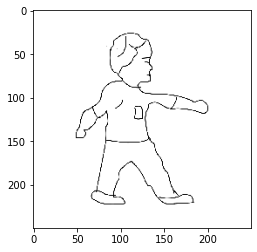

1/1 [==============================] - 0s 23ms/step
angel


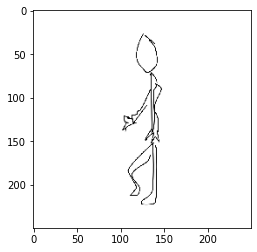

1/1 [==============================] - 0s 24ms/step
screwdriver


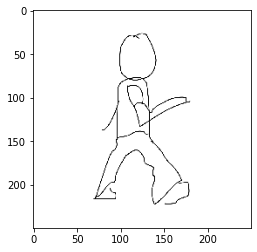

1/1 [==============================] - 0s 22ms/step
person


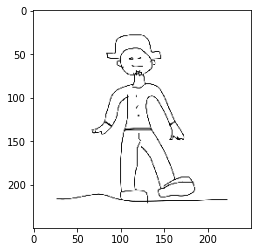

1/1 [==============================] - 0s 34ms/step
angel


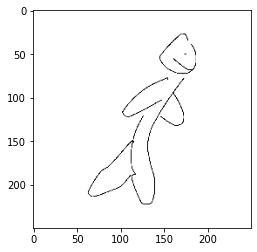

1/1 [==============================] - 0s 22ms/step
person


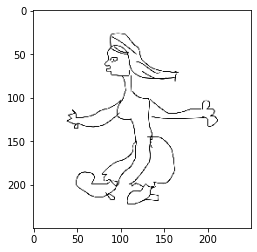

1/1 [==============================] - 0s 23ms/step
angel


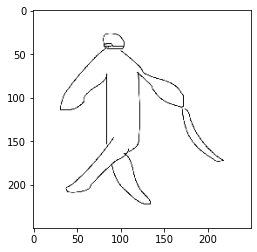

1/1 [==============================] - 0s 23ms/step
dog


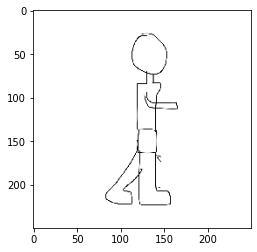

1/1 [==============================] - 0s 24ms/step
person


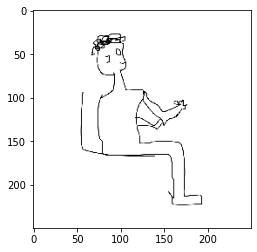

1/1 [==============================] - 0s 22ms/step
person


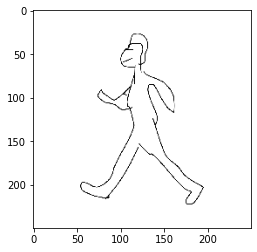

1/1 [==============================] - 0s 23ms/step
monkey


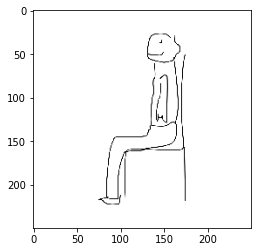

1/1 [==============================] - 0s 22ms/step
person


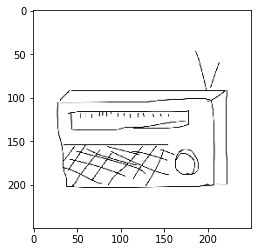

1/1 [==============================] - 0s 22ms/step
radio


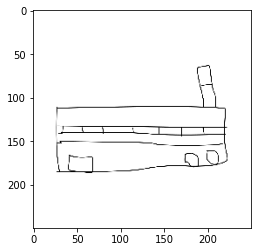

1/1 [==============================] - 0s 23ms/step
radio


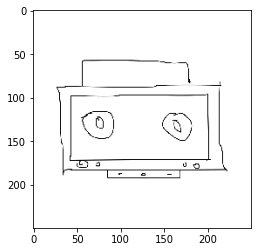

1/1 [==============================] - 0s 22ms/step
radio


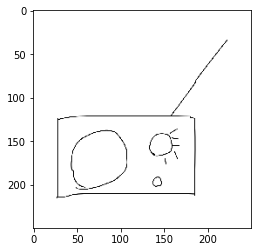

1/1 [==============================] - 0s 23ms/step
radio


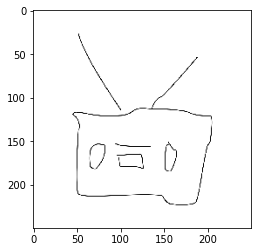

1/1 [==============================] - 0s 33ms/step
horse


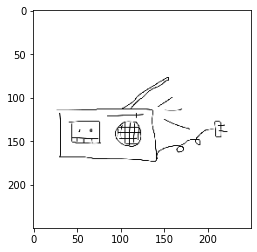

1/1 [==============================] - 0s 22ms/step
shoe


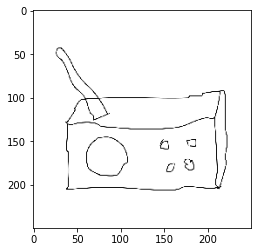

1/1 [==============================] - 0s 21ms/step
book


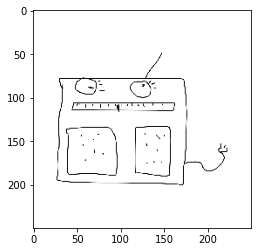

1/1 [==============================] - 0s 22ms/step
radio


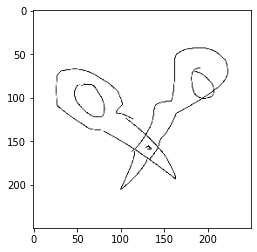

1/1 [==============================] - 0s 26ms/step
duck


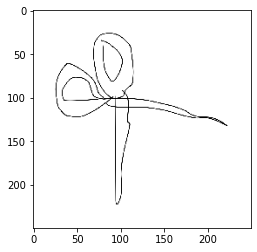

1/1 [==============================] - 0s 22ms/step
monkey


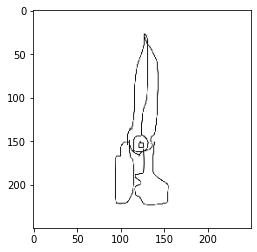

1/1 [==============================] - 0s 22ms/step
angel


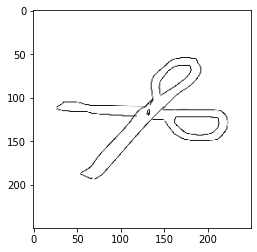

1/1 [==============================] - 0s 24ms/step
scissors


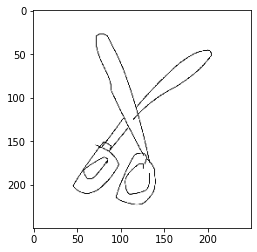

1/1 [==============================] - 0s 22ms/step
scissors


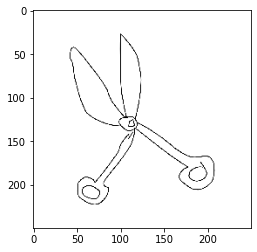

1/1 [==============================] - 0s 23ms/step
scissors


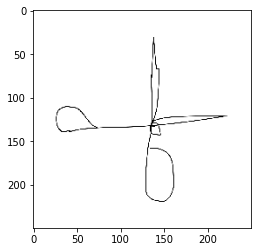

1/1 [==============================] - 0s 25ms/step
screwdriver


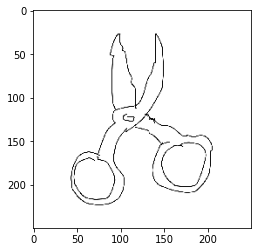

1/1 [==============================] - 0s 21ms/step
scissors


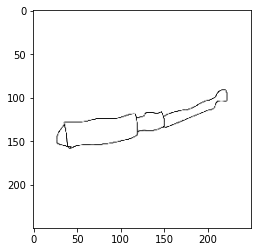

1/1 [==============================] - 0s 22ms/step
helicopter


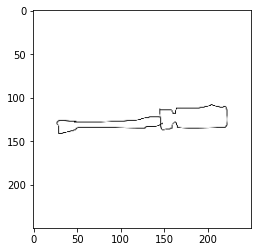

1/1 [==============================] - 0s 24ms/step
pen


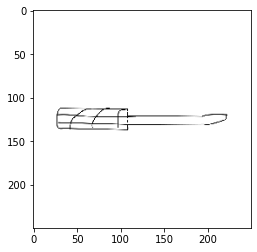

1/1 [==============================] - 0s 23ms/step
screwdriver


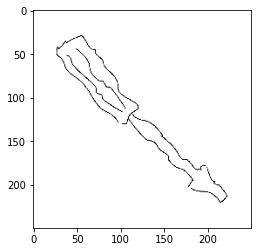

1/1 [==============================] - 0s 28ms/step
knife


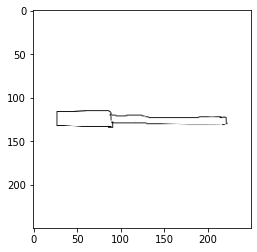

1/1 [==============================] - 0s 23ms/step
screwdriver


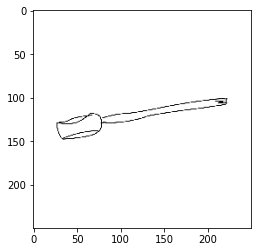

1/1 [==============================] - 0s 23ms/step
key


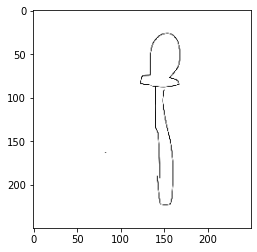

1/1 [==============================] - 0s 37ms/step
cat


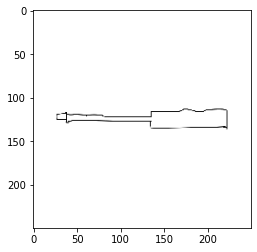

1/1 [==============================] - 0s 22ms/step
knife


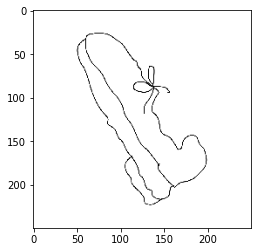

1/1 [==============================] - 0s 22ms/step
angel


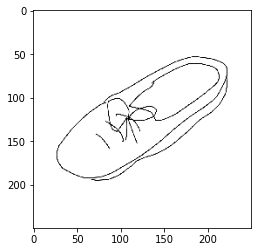

1/1 [==============================] - 0s 23ms/step
shoe


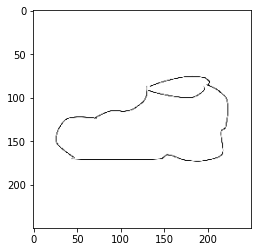

1/1 [==============================] - 0s 31ms/step
shoe


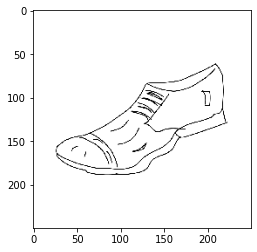

1/1 [==============================] - 0s 22ms/step
shoe


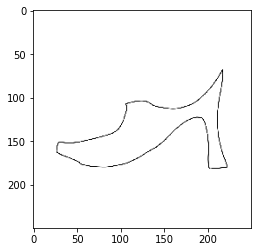

1/1 [==============================] - 0s 22ms/step
shoe


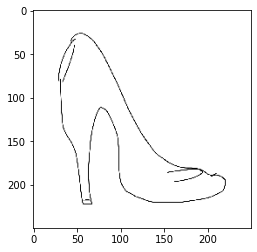

1/1 [==============================] - 0s 22ms/step
duck


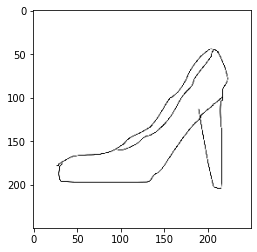

1/1 [==============================] - 0s 24ms/step
socks


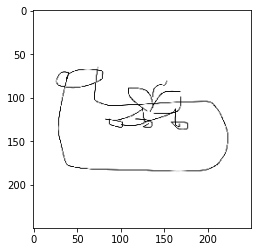

1/1 [==============================] - 0s 23ms/step
shoe


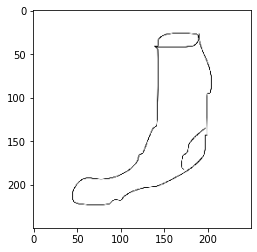

1/1 [==============================] - 0s 24ms/step
cat


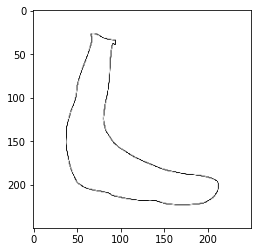

1/1 [==============================] - 0s 23ms/step
socks


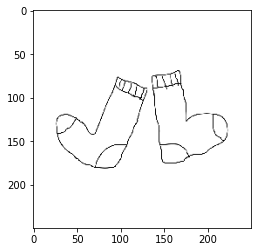

1/1 [==============================] - 0s 22ms/step
socks


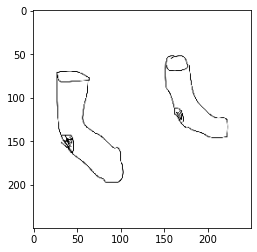

1/1 [==============================] - 0s 23ms/step
horse


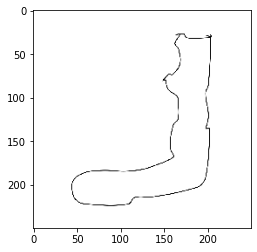

1/1 [==============================] - 0s 23ms/step
book


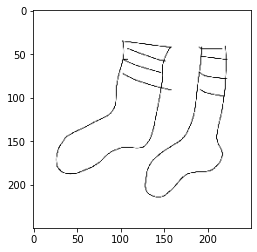

1/1 [==============================] - 0s 24ms/step
angel


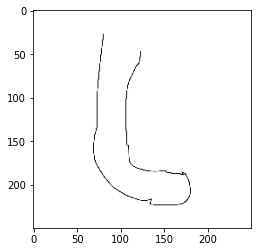

1/1 [==============================] - 0s 22ms/step
moon


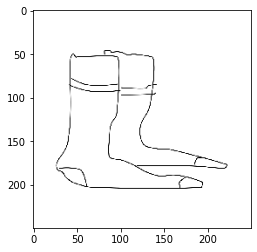

1/1 [==============================] - 0s 22ms/step
book


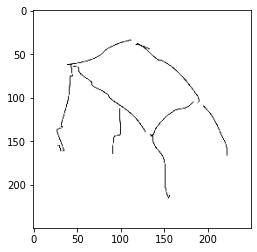

1/1 [==============================] - 0s 21ms/step
binoculars


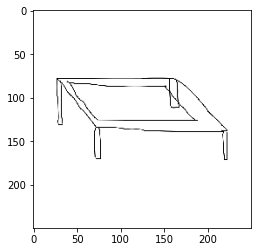

1/1 [==============================] - 0s 22ms/step
teacup


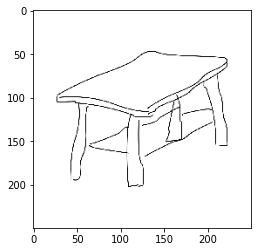

1/1 [==============================] - 0s 22ms/step
table


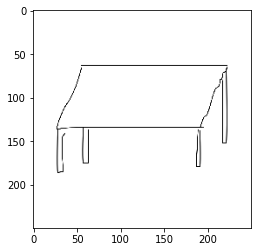

1/1 [==============================] - 0s 23ms/step
table


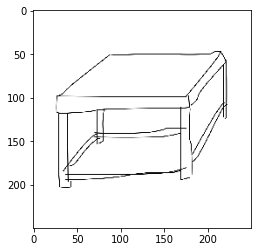

1/1 [==============================] - 0s 23ms/step
bus


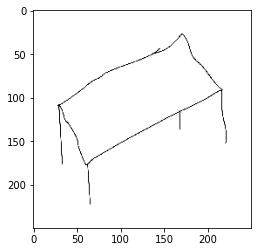

1/1 [==============================] - 0s 21ms/step
table


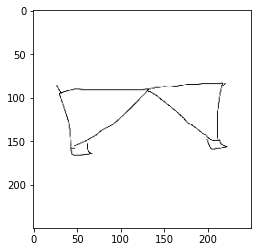

1/1 [==============================] - 0s 22ms/step
table


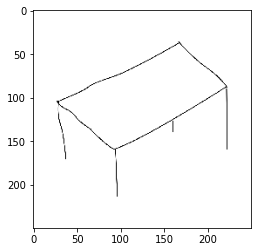

1/1 [==============================] - 0s 34ms/step
table


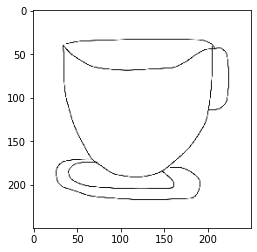

1/1 [==============================] - 0s 22ms/step
basket


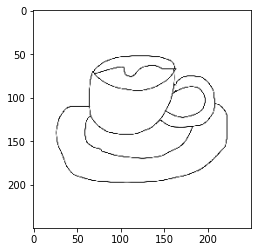

1/1 [==============================] - 0s 25ms/step
basket


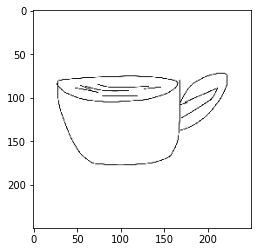

1/1 [==============================] - 0s 22ms/step
teacup


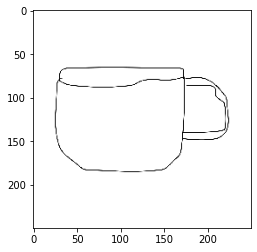

1/1 [==============================] - 0s 22ms/step
teacup


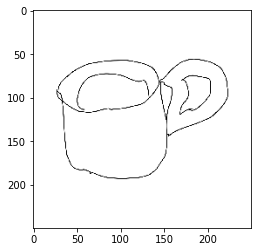

1/1 [==============================] - 0s 23ms/step
basket


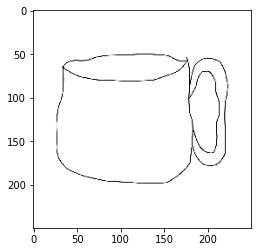

1/1 [==============================] - 0s 23ms/step
teacup


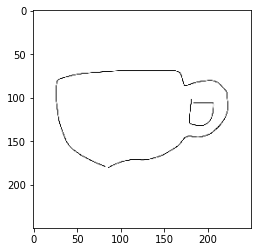

1/1 [==============================] - 0s 22ms/step
teacup


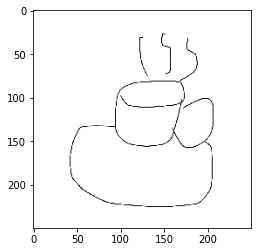

1/1 [==============================] - 0s 22ms/step
teacup


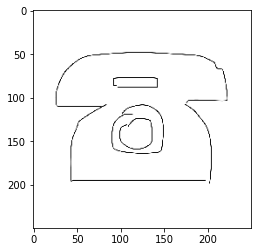

1/1 [==============================] - 0s 32ms/step
telephone


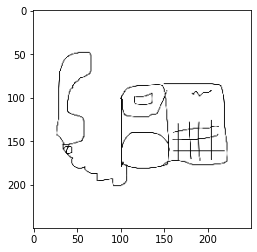

1/1 [==============================] - 0s 22ms/step
telephone


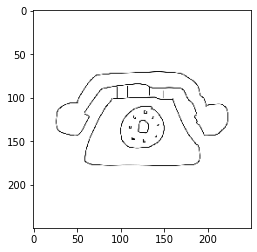

1/1 [==============================] - 0s 29ms/step
telephone


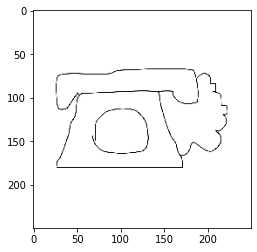

1/1 [==============================] - 0s 25ms/step
camera


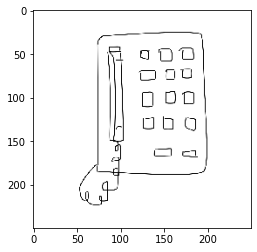

1/1 [==============================] - 0s 23ms/step
telephone


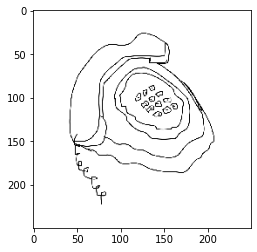

1/1 [==============================] - 0s 23ms/step
backpack


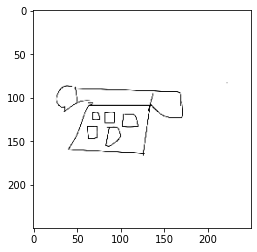

1/1 [==============================] - 0s 24ms/step
telephone


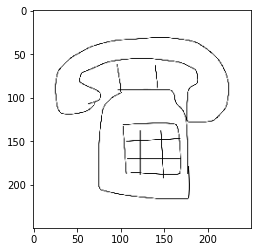

1/1 [==============================] - 0s 22ms/step
telephone


In [ ]:
dir_path = './output/test/'

classNames =classes

for i in classNames:
  for j in os.listdir(dir_path+'/'+i):
    img = image.load_img(dir_path+'/'+i+'/'+j,target_size=(250,250))
    plt.imshow(img)
    plt.show()
    #print(j)
    X = image.img_to_array(img)
    X = np.expand_dims (X,axis = 0)
    images = np.vstack([X])
    #print(images)
    val = cnn.predict(images)
    ind = np.argmax(val[0])
    #print(val[0])
    print(classNames[ind])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 59, 59, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 29, 29, 128)      0

In [ ]:
cnn.save('cnn_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
model_cnn = load_model('cnn_model.h5')

In [ ]:
import pickle
with open('model_cnn.pkl','wb') as f:
  pickle.dump(cnn,f)

In [ ]:
with open('model_cnn.pkl','rb') as f:
  model_cnn = pickle.load(f)

In [ ]:
dir(model_cnn)

['_SCALAR_UPRANKING_ON',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__call__',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_activity_regularizer',
 '_add_trackable',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_assert_compile_was_called',
 '_assert_weights_created',
 '_auto_track_sub_layers',
 '_autocast',
 '_autographed_call',
 '_base_model_initialized',
 '_build_graph_network_for_inferred_shape',
 '_build_input_shape',
 '_call_accepts_kwargs',
 '_call_arg_was_passed',
 '_call_fn_arg_defaults',
 '_call_fn_arg_positions',
 '_call_fn_args',
 '_call_full_argspec',
 '_callable_losses',
 '_ca

In [ ]:
img = image.load_img("/content/sixth_png_50/angel/162.png",target_size=(250,250))
X = image.img_to_array(img)
X = np.expand_dims (X,axis = 0)
images = np.vstack([X])
model_cnn.predict(images)

1/1 [==============================] - 0s 70ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.]], dtype=float32)

In [ ]:
type(X)

numpy.ndarray